# PRCP-1025-FlightFarePrediction

### **Problem Statement**
**Flight ticket prices can be something hard to guess, today we might see a price, check out the price of the same flight tomorrow, it will be a different story. We might have often heard travelers saying that flight ticket prices are so unpredictable. That’s why we will try to use machine learning to solve this problem. This can help airlines by predicting what prices they can maintain.**


### **Business Goal**
**The goal is to build a regression model to predict the fare of flights based on various features and analysis.which will help the customers make informed decisionns and airline optimize pricing strategies**

## **Importing Python Libraries**

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings as ws
ws.filterwarnings('ignore')

In [5]:
data=pd.read_excel('Flight_Fare.xlsx')
pd.set_option('display.max_columns',None)

In [6]:
data

Airline Date_of_Journey    Source Destination  \
0           IndiGo      24/03/2019  Banglore   New Delhi   
1        Air India       1/05/2019   Kolkata    Banglore   
2      Jet Airways       9/06/2019     Delhi      Cochin   
3           IndiGo      12/05/2019   Kolkata    Banglore   
4           IndiGo      01/03/2019  Banglore   New Delhi   
...            ...             ...       ...         ...   
10678     Air Asia       9/04/2019   Kolkata    Banglore   
10679    Air India      27/04/2019   Kolkata    Banglore   
10680  Jet Airways      27/04/2019  Banglore       Delhi   
10681      Vistara      01/03/2019  Banglore   New Delhi   
10682    Air India       9/05/2019     Delhi      Cochin   

                       Route Dep_Time  Arrival_Time Duration Total_Stops  \
0                  BLR → DEL    22:20  01:10 22 Mar   2h 50m    non-stop   
1      CCU → IXR → BBI → BLR    05:50         13:15   7h 25m     2 stops   
2      DEL → LKO → BOM → COK    09:25  04:25 10 Jun      19h     2 stops   
3            CCU → NAG → BLR    18:05         23:30   5h 25m      1 stop   
4            BLR → NAG → DEL    16:50         21:35   4h 45m      1 stop   
...                      ...      ...           ...      ...         ...   
10678              CCU → BLR    19:55         22:25   2h 30m    non-stop   
10679              CCU → BLR    20:45         23:20   2h 35m    non-stop   
10680              BLR → DEL    08:20         11:20       3h    non-stop   
10681              BLR → DEL    11:30         14:10   2h 40m    non-stop   
10682  DEL → GOI → BOM → COK    10:55         19:15   8h 20m     2 stops   

      Additional_Info  Price  
0             No info   3897  
1             No info   7662  
2             No info  13882  
3             No info   6218  
4             No info  13302  
...               ...    ...  
10678         No info   4107  
10679         No info   4145  
10680         No info   7229  
10681         No info  12648  
10682         No info  11753  

[10683 rows x 11 columns]

## **Basic Info**

In [7]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [8]:
data.describe(include='O').T

count unique              top  freq
Airline          10683     12      Jet Airways  3849
Date_of_Journey  10683     44       18/05/2019   504
Source           10683      5            Delhi  4537
Destination      10683      6           Cochin  4537
Route            10682    128  DEL → BOM → COK  2376
Dep_Time         10683    222            18:55   233
Arrival_Time     10683   1343            19:00   423
Duration         10683    368           2h 50m   550
Total_Stops      10682      5           1 stop  5625
Additional_Info  10683     10          No info  8345

In [9]:
data.shape

(10683, 11)

## **Data Preprocessing**

### Checking Null values/Missing values

In [10]:
data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [11]:
data.dropna(inplace=True)

In [12]:
data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [13]:
data.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

## **Converting Date and Time into Numerical**

In [14]:
data.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

## **Splitting Dates**

In [15]:
from datetime import datetime as dt

### Changing date and time for day of journey

In [16]:
data['Journey_Day']= pd.to_datetime(data.Date_of_Journey,dayfirst=True).dt.day 

In [17]:
data['Journey_mon']= pd.to_datetime(data.Date_of_Journey,dayfirst=True).dt.month

In [18]:
data.drop(columns='Date_of_Journey',axis=1,inplace=True)

### Changing date and time for Dep_Time

In [19]:
data['Dep_hour']=pd.to_datetime(data['Dep_Time'],utc=True).dt.hour

In [20]:
data['Dep_min']=pd.to_datetime(data['Dep_Time'],utc=True).dt.minute

In [21]:
data.drop(columns='Dep_Time',axis=1,inplace=True)

### Changing date and time for Arrival_Time

In [22]:
data['Arrival_hour']=pd.to_datetime(data.Arrival_Time).dt.hour

In [23]:
data['Arrival_min']=pd.to_datetime(data.Arrival_Time).dt.minute

In [24]:
data.drop(columns='Arrival_Time',axis=1,inplace=True)

## **Applying Preprocessing on duration column**

In [25]:
duration = list(data['Duration'])

In [26]:
for i in range(len(duration)):
    if len(duration[i].split()) !=2:
        if 'h' in duration[i]:
            duration[i]=duration[i].strip()+' 0m'
        else:
            duration[i]='0h '+ duration[i]

In [27]:
duration_hours=[]
duration_mins=[]

In [28]:
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0])) 
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))

In [29]:
data['duration_hours']=duration_hours

In [30]:
data['duration_mins']=duration_mins

In [31]:
data.drop(columns='Duration',axis=1,inplace=True)

In [32]:
data

Airline    Source Destination                  Route Total_Stops  \
0           IndiGo  Banglore   New Delhi              BLR → DEL    non-stop   
1        Air India   Kolkata    Banglore  CCU → IXR → BBI → BLR     2 stops   
2      Jet Airways     Delhi      Cochin  DEL → LKO → BOM → COK     2 stops   
3           IndiGo   Kolkata    Banglore        CCU → NAG → BLR      1 stop   
4           IndiGo  Banglore   New Delhi        BLR → NAG → DEL      1 stop   
...            ...       ...         ...                    ...         ...   
10678     Air Asia   Kolkata    Banglore              CCU → BLR    non-stop   
10679    Air India   Kolkata    Banglore              CCU → BLR    non-stop   
10680  Jet Airways  Banglore       Delhi              BLR → DEL    non-stop   
10681      Vistara  Banglore   New Delhi              BLR → DEL    non-stop   
10682    Air India     Delhi      Cochin  DEL → GOI → BOM → COK     2 stops   

      Additional_Info  Price  Journey_Day  Journey_mon  Dep_hour  Dep_min  \
0             No info   3897           24            3        22       20   
1             No info   7662            1            5         5       50   
2             No info  13882            9            6         9       25   
3             No info   6218           12            5        18        5   
4             No info  13302            1            3        16       50   
...               ...    ...          ...          ...       ...      ...   
10678         No info   4107            9            4        19       55   
10679         No info   4145           27            4        20       45   
10680         No info   7229           27            4         8       20   
10681         No info  12648            1            3        11       30   
10682         No info  11753            9            5        10       55   

       Arrival_hour  Arrival_min  duration_hours  duration_mins  
0                 1           10               2             50  
1                13           15               7             25  
2                 4           25              19              0  
3                23           30               5             25  
4                21           35               4             45  
...             ...          ...             ...            ...  
10678            22           25               2             30  
10679            23           20               2             35  
10680            11           20               3              0  
10681            14           10               2             40  
10682            19           15               8             20  

[10682 rows x 15 columns]

## **EDA and Encoding**
## Handling Categorical Data

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10682 entries, 0 to 10682
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Source           10682 non-null  object
 2   Destination      10682 non-null  object
 3   Route            10682 non-null  object
 4   Total_Stops      10682 non-null  object
 5   Additional_Info  10682 non-null  object
 6   Price            10682 non-null  int64 
 7   Journey_Day      10682 non-null  int32 
 8   Journey_mon      10682 non-null  int32 
 9   Dep_hour         10682 non-null  int32 
 10  Dep_min          10682 non-null  int32 
 11  Arrival_hour     10682 non-null  int32 
 12  Arrival_min      10682 non-null  int32 
 13  duration_hours   10682 non-null  int64 
 14  duration_mins    10682 non-null  int64 
dtypes: int32(6), int64(3), object(6)
memory usage: 1.1+ MB


### **Airline vs Price Analysis**

<Figure size 2000x2500 with 0 Axes>

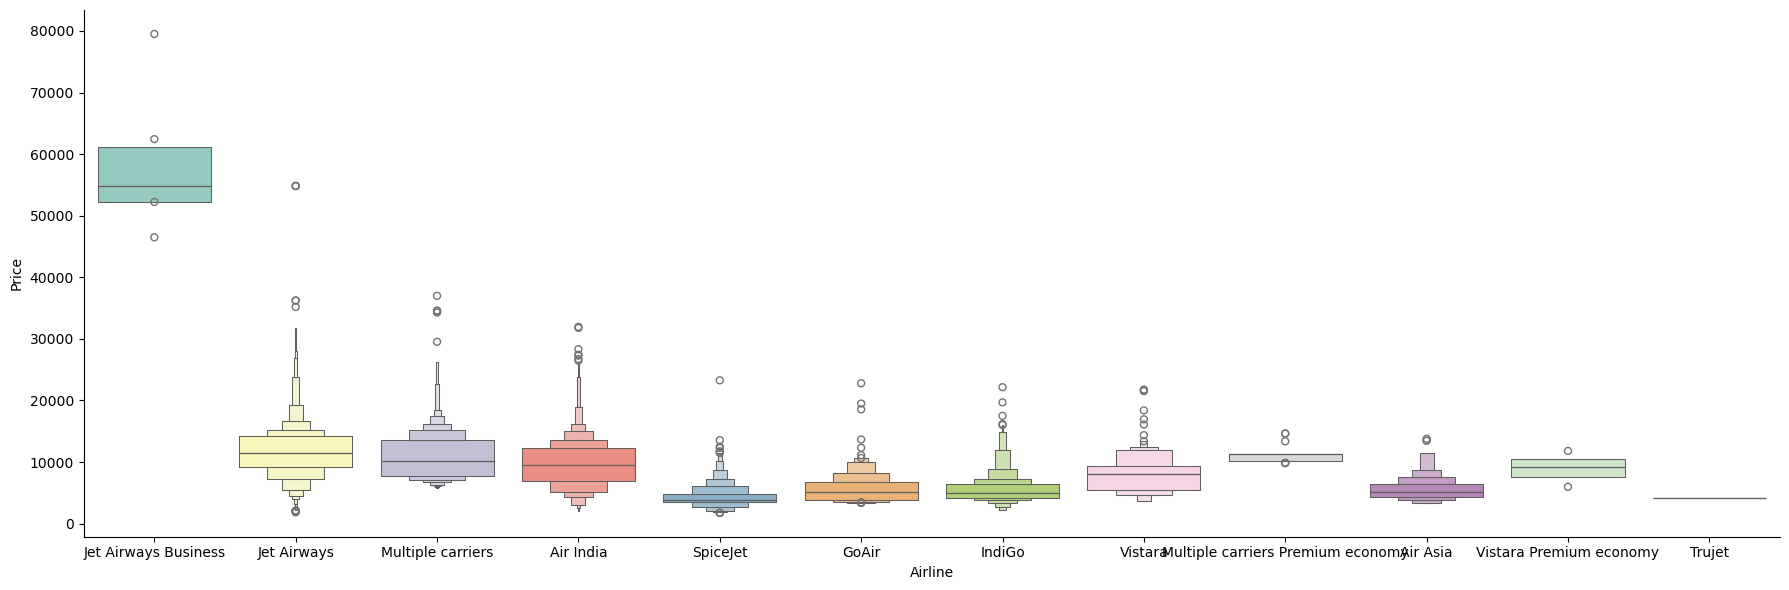

In [34]:
plt.figure(figsize=(20,25),facecolor='white')
sns.catplot(data=data.sort_values('Price',ascending=False),x='Airline',y='Price',kind='boxen',height=6,aspect=3,palette='Set3')
plt.show()

#### **Encoding for Airline**

In [35]:
data.Airline.value_counts()

Airline
Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: count, dtype: int64

In [36]:
Airline=data['Airline']
Airline=pd.get_dummies(Airline,drop_first=True)
Airline

Air India  GoAir  IndiGo  Jet Airways  Jet Airways Business  \
0          False  False    True        False                 False   
1           True  False   False        False                 False   
2          False  False   False         True                 False   
3          False  False    True        False                 False   
4          False  False    True        False                 False   
...          ...    ...     ...          ...                   ...   
10678      False  False   False        False                 False   
10679       True  False   False        False                 False   
10680      False  False   False         True                 False   
10681      False  False   False        False                 False   
10682       True  False   False        False                 False   

       Multiple carriers  Multiple carriers Premium economy  SpiceJet  Trujet  \
0                  False                              False     False   False   
1                  False                              False     False   False   
2                  False                              False     False   False   
3                  False                              False     False   False   
4                  False                              False     False   False   
...                  ...                                ...       ...     ...   
10678              False                              False     False   False   
10679              False                              False     False   False   
10680              False                              False     False   False   
10681              False                              False     False   False   
10682              False                              False     False   False   

       Vistara  Vistara Premium economy  
0        False                    False  
1        False                    False  
2        False                    False  
3        False                    False  
4        False                    False  
...        ...                      ...  
10678    False                    False  
10679    False                    False  
10680    False                    False  
10681     True                    False  
10682    False                    False  

[10682 rows x 11 columns]

In [37]:
Airline

Air India  GoAir  IndiGo  Jet Airways  Jet Airways Business  \
0          False  False    True        False                 False   
1           True  False   False        False                 False   
2          False  False   False         True                 False   
3          False  False    True        False                 False   
4          False  False    True        False                 False   
...          ...    ...     ...          ...                   ...   
10678      False  False   False        False                 False   
10679       True  False   False        False                 False   
10680      False  False   False         True                 False   
10681      False  False   False        False                 False   
10682       True  False   False        False                 False   

       Multiple carriers  Multiple carriers Premium economy  SpiceJet  Trujet  \
0                  False                              False     False   False   
1                  False                              False     False   False   
2                  False                              False     False   False   
3                  False                              False     False   False   
4                  False                              False     False   False   
...                  ...                                ...       ...     ...   
10678              False                              False     False   False   
10679              False                              False     False   False   
10680              False                              False     False   False   
10681              False                              False     False   False   
10682              False                              False     False   False   

       Vistara  Vistara Premium economy  
0        False                    False  
1        False                    False  
2        False                    False  
3        False                    False  
4        False                    False  
...        ...                      ...  
10678    False                    False  
10679    False                    False  
10680    False                    False  
10681     True                    False  
10682    False                    False  

[10682 rows x 11 columns]

In [38]:
data.drop(columns='Airline',axis=1,inplace= True)

In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10682 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Source           10682 non-null  object
 1   Destination      10682 non-null  object
 2   Route            10682 non-null  object
 3   Total_Stops      10682 non-null  object
 4   Additional_Info  10682 non-null  object
 5   Price            10682 non-null  int64 
 6   Journey_Day      10682 non-null  int32 
 7   Journey_mon      10682 non-null  int32 
 8   Dep_hour         10682 non-null  int32 
 9   Dep_min          10682 non-null  int32 
 10  Arrival_hour     10682 non-null  int32 
 11  Arrival_min      10682 non-null  int32 
 12  duration_hours   10682 non-null  int64 
 13  duration_mins    10682 non-null  int64 
dtypes: int32(6), int64(3), object(5)
memory usage: 1001.4+ KB


### **Source vs Price Analysis**

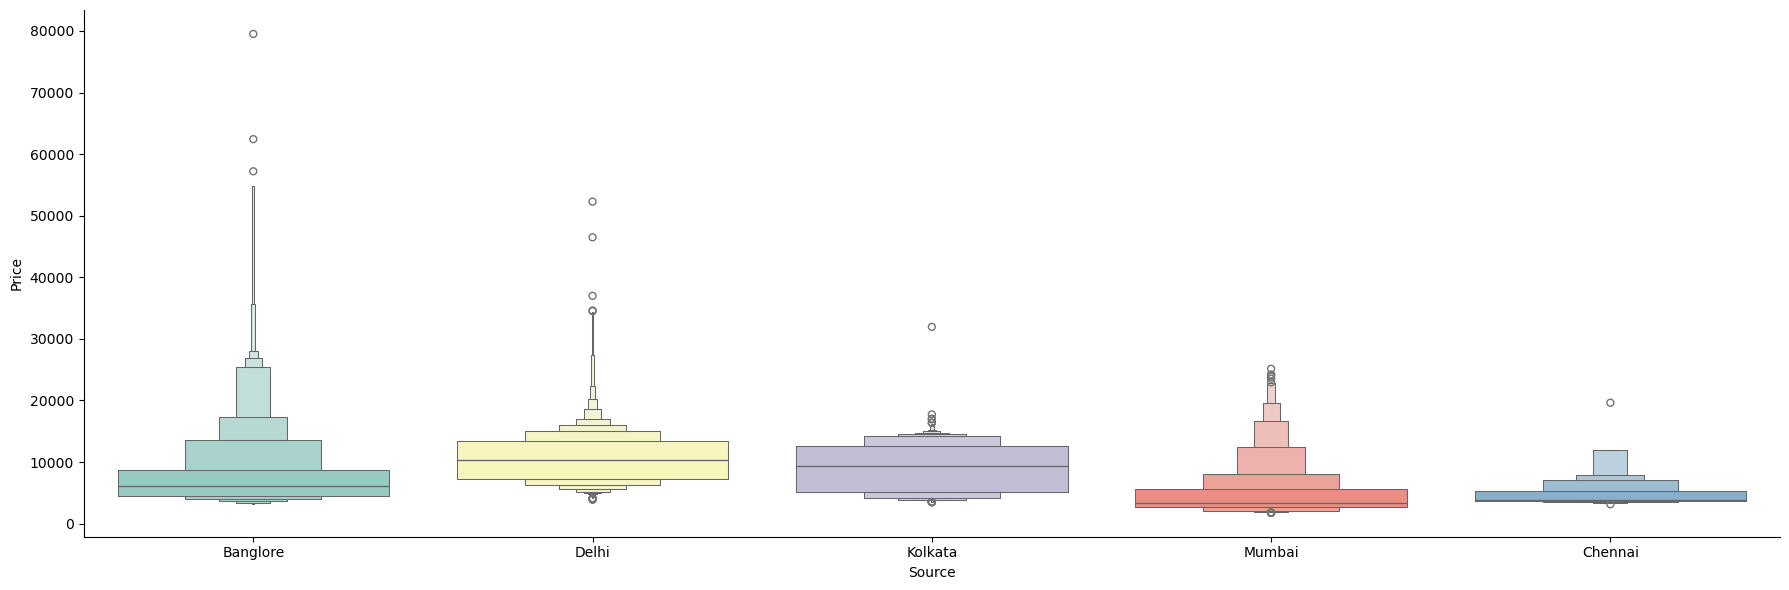

In [40]:
sns.catplot(data.sort_values('Price',ascending=False),x='Source',y='Price',palette='Set3',height=6,aspect=3,kind='boxen')
plt.show()

#### Encoding For Source Data

In [41]:
Source=data['Source']
Source=pd.get_dummies(Source,drop_first=True)
Source

Chennai  Delhi  Kolkata  Mumbai
0        False  False    False   False
1        False  False     True   False
2        False   True    False   False
3        False  False     True   False
4        False  False    False   False
...        ...    ...      ...     ...
10678    False  False     True   False
10679    False  False     True   False
10680    False  False    False   False
10681    False  False    False   False
10682    False   True    False   False

[10682 rows x 4 columns]

In [42]:
data.drop(columns='Source',axis=1,inplace=True)

In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10682 entries, 0 to 10682
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Destination      10682 non-null  object
 1   Route            10682 non-null  object
 2   Total_Stops      10682 non-null  object
 3   Additional_Info  10682 non-null  object
 4   Price            10682 non-null  int64 
 5   Journey_Day      10682 non-null  int32 
 6   Journey_mon      10682 non-null  int32 
 7   Dep_hour         10682 non-null  int32 
 8   Dep_min          10682 non-null  int32 
 9   Arrival_hour     10682 non-null  int32 
 10  Arrival_min      10682 non-null  int32 
 11  duration_hours   10682 non-null  int64 
 12  duration_mins    10682 non-null  int64 
dtypes: int32(6), int64(3), object(4)
memory usage: 918.0+ KB


### **Destination vs Price Analysis**

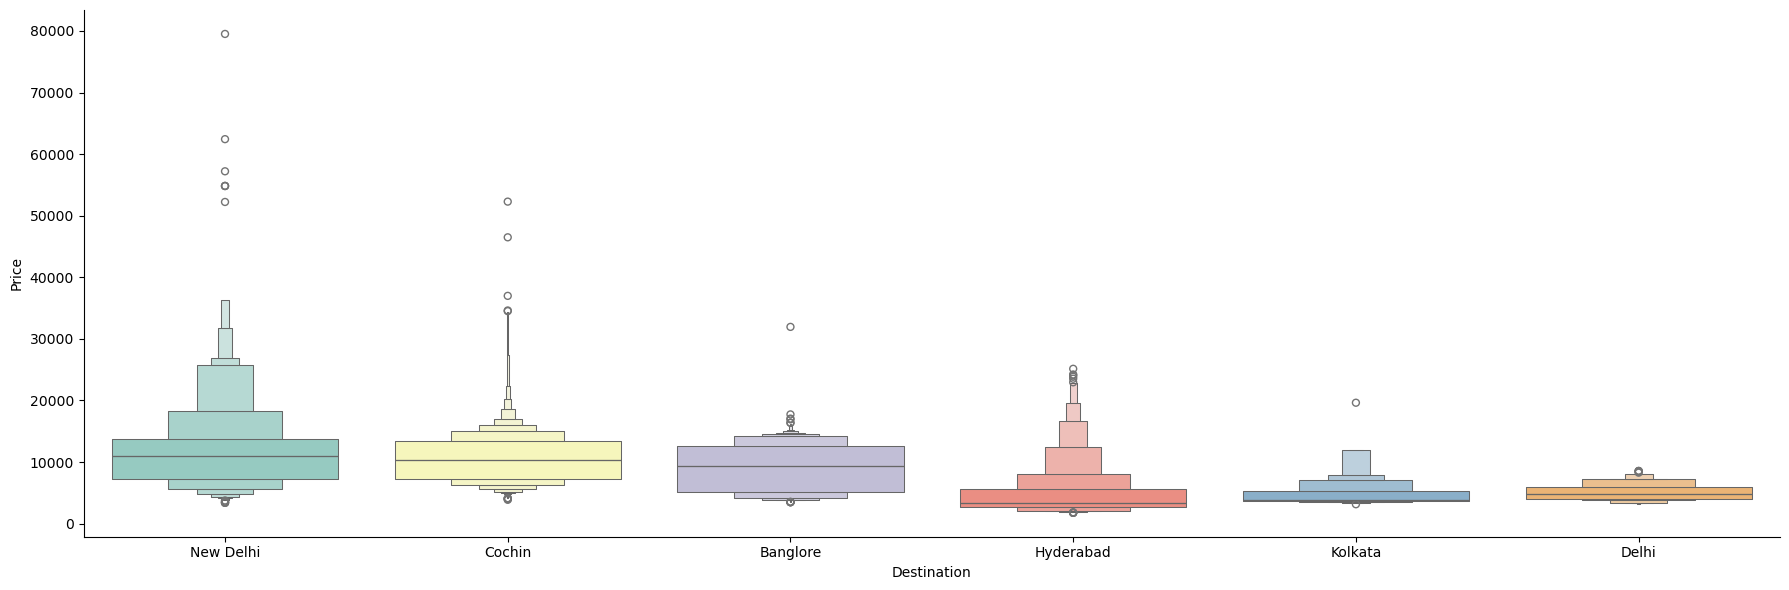

In [44]:
sns.catplot(data=data.sort_values('Price',ascending=False),x='Destination',y='Price',height=6,aspect=3,kind='boxen',palette='Set3',)
plt.show()

#### Encoding For Destination

In [45]:
data.Destination.value_counts()

Destination
Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: count, dtype: int64

In [46]:
Destination=data['Destination']
Destination=pd.get_dummies(Destination,drop_first=True)
Destination

Cochin  Delhi  Hyderabad  Kolkata  New Delhi
0       False  False      False    False       True
1       False  False      False    False      False
2        True  False      False    False      False
3       False  False      False    False      False
4       False  False      False    False       True
...       ...    ...        ...      ...        ...
10678   False  False      False    False      False
10679   False  False      False    False      False
10680   False   True      False    False      False
10681   False  False      False    False       True
10682    True  False      False    False      False

[10682 rows x 5 columns]

In [47]:
data.drop(columns='Destination',axis=1,inplace=True)

In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10682 entries, 0 to 10682
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Route            10682 non-null  object
 1   Total_Stops      10682 non-null  object
 2   Additional_Info  10682 non-null  object
 3   Price            10682 non-null  int64 
 4   Journey_Day      10682 non-null  int32 
 5   Journey_mon      10682 non-null  int32 
 6   Dep_hour         10682 non-null  int32 
 7   Dep_min          10682 non-null  int32 
 8   Arrival_hour     10682 non-null  int32 
 9   Arrival_min      10682 non-null  int32 
 10  duration_hours   10682 non-null  int64 
 11  duration_mins    10682 non-null  int64 
dtypes: int32(6), int64(3), object(3)
memory usage: 834.5+ KB


### **Removing the Route Feature**

In [49]:
Route_and_Total_Stops=data[['Route','Total_Stops']]
pd.set_option('display.max_rows',None)
Route_and_Total_Stops

Route Total_Stops
0                              BLR → DEL    non-stop
1                  CCU → IXR → BBI → BLR     2 stops
2                  DEL → LKO → BOM → COK     2 stops
3                        CCU → NAG → BLR      1 stop
4                        BLR → NAG → DEL      1 stop
5                              CCU → BLR    non-stop
6                        BLR → BOM → DEL      1 stop
7                        BLR → BOM → DEL      1 stop
8                        BLR → BOM → DEL      1 stop
9                        DEL → BOM → COK      1 stop
10                       DEL → BLR → COK      1 stop
11                             CCU → BLR    non-stop
12                             MAA → CCU    non-stop
13                       CCU → BOM → BLR      1 stop
14                             CCU → BLR    non-stop
15                 DEL → AMD → BOM → COK     2 stops
16                       DEL → PNQ → COK      1 stop
17                       DEL → BOM → COK      1 stop
18                 DEL → CCU → BOM → COK     2 stops
19                       DEL → BOM → COK      1 stop
20                       DEL → BOM → COK      1 stop
21                       BLR → COK → DEL      1 stop
22                             BLR → DEL    non-stop
23                             BLR → DEL    non-stop
24                       CCU → BOM → BLR      1 stop
25                 DEL → IDR → BOM → COK     2 stops
26                       DEL → LKO → COK      1 stop
27                       DEL → BOM → COK      1 stop
28                             BLR → DEL    non-stop
29                             MAA → CCU    non-stop
30                             MAA → CCU    non-stop
31                 CCU → GAU → DEL → BLR     2 stops
32                             BLR → DEL    non-stop
33                 DEL → NAG → BOM → COK     2 stops
34                       DEL → BOM → COK      1 stop
35                       DEL → BOM → COK      1 stop
36                       CCU → MAA → BLR      1 stop
37                             CCU → BLR    non-stop
38                       BLR → BOM → DEL      1 stop
39                       DEL → BOM → COK      1 stop
40                       DEL → HYD → COK      1 stop
41                       BLR → BOM → DEL      1 stop
42                       DEL → BOM → COK      1 stop
43                             BLR → DEL    non-stop
44                       DEL → BOM → COK      1 stop
45                             BLR → DEL    non-stop
46                             BLR → DEL    non-stop
47                             MAA → CCU    non-stop
48                       CCU → HYD → BLR      1 stop
49                 DEL → AMD → BOM → COK     2 stops
50                             DEL → COK    non-stop
51                       CCU → DEL → BLR      1 stop
52                             BLR → DEL    non-stop
53                             BLR → DEL    non-stop
54                             BLR → DEL    non-stop
55                       CCU → BOM → BLR      1 stop
56                 BLR → BOM → AMD → DEL     2 stops
57                             MAA → CCU    non-stop
58                       DEL → BOM → COK      1 stop
59                       BOM → DEL → HYD      1 stop
60                       CCU → BOM → BLR      1 stop
61                       DEL → MAA → COK      1 stop
62                       DEL → BOM → COK      1 stop
63                       DEL → BOM → COK      1 stop
64                             MAA → CCU    non-stop
65                       DEL → BOM → COK      1 stop
66                             BLR → DEL    non-stop
67                             BOM → HYD    non-stop
68                 DEL → BHO → BOM → COK     2 stops
69                             MAA → CCU    non-stop
70                             BOM → HYD    non-stop
71                       BLR → BOM → DEL      1 stop
72                       DEL → BOM → COK      1 stop
73                 DEL → AMD → BOM → COK     2 stops
74                       DEL → BLR → COK      1 stop
75     

In [50]:
data.drop(columns='Route',axis=1,inplace=True)
pd.reset_option('display.max_rows',None)
data

Total_Stops Additional_Info  Price  Journey_Day  Journey_mon  Dep_hour  \
0        non-stop         No info   3897           24            3        22   
1         2 stops         No info   7662            1            5         5   
2         2 stops         No info  13882            9            6         9   
3          1 stop         No info   6218           12            5        18   
4          1 stop         No info  13302            1            3        16   
...           ...             ...    ...          ...          ...       ...   
10678    non-stop         No info   4107            9            4        19   
10679    non-stop         No info   4145           27            4        20   
10680    non-stop         No info   7229           27            4         8   
10681    non-stop         No info  12648            1            3        11   
10682     2 stops         No info  11753            9            5        10   

       Dep_min  Arrival_hour  Arrival_min  duration_hours  duration_mins  
0           20             1           10               2             50  
1           50            13           15               7             25  
2           25             4           25              19              0  
3            5            23           30               5             25  
4           50            21           35               4             45  
...        ...           ...          ...             ...            ...  
10678       55            22           25               2             30  
10679       45            23           20               2             35  
10680       20            11           20               3              0  
10681       30            14           10               2             40  
10682       55            19           15               8             20  

[10682 rows x 11 columns]

### **Total_stops vs Price Analysis**

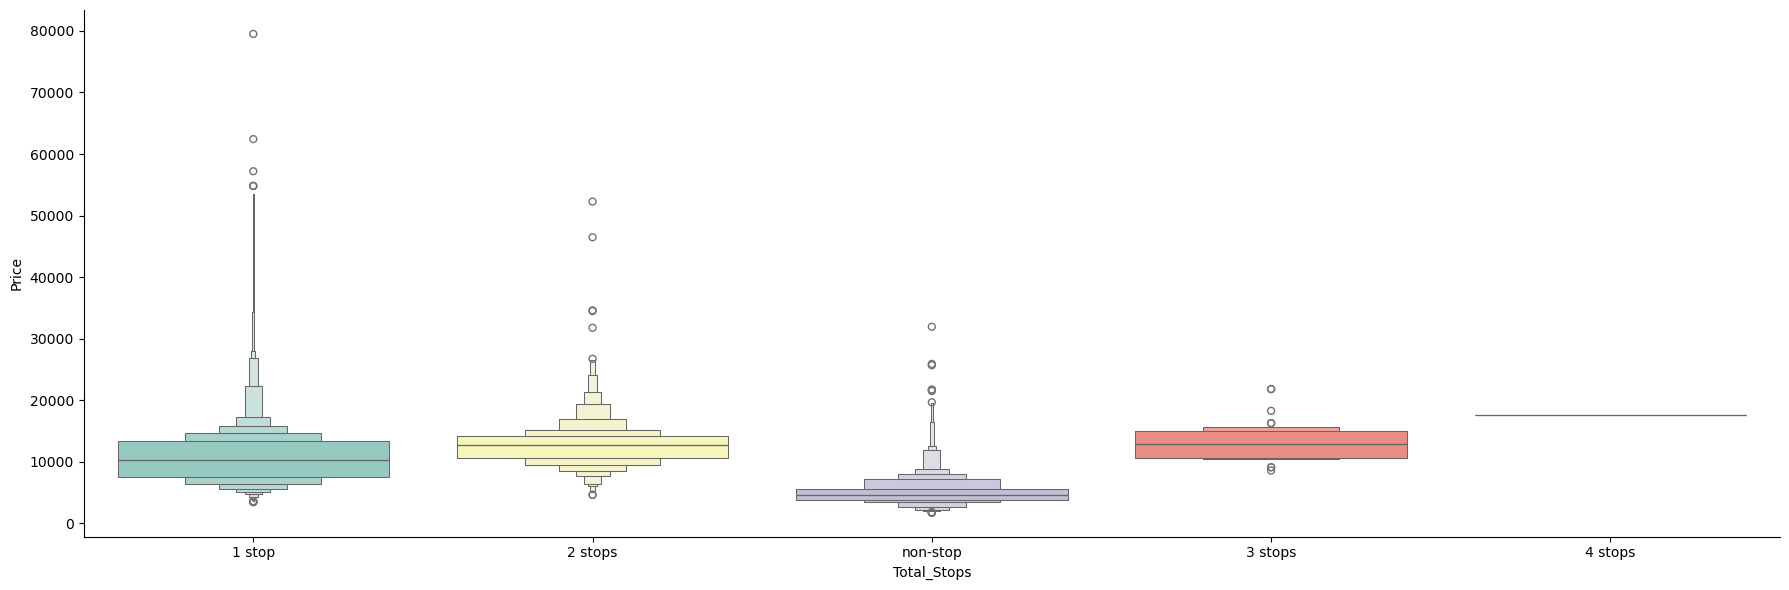

In [51]:
sns.catplot(data=data.sort_values('Price',ascending=False),x='Total_Stops',y='Price',height=6,aspect=3,kind='boxen',palette='Set3',)
plt.show()

#### Encoding for Total_Stops

In [52]:
data.Total_Stops.value_counts()

Total_Stops
1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: count, dtype: int64

In [53]:
data.replace({'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4},inplace=True)
data

Total_Stops Additional_Info  Price  Journey_Day  Journey_mon  Dep_hour  \
0                0         No info   3897           24            3        22   
1                2         No info   7662            1            5         5   
2                2         No info  13882            9            6         9   
3                1         No info   6218           12            5        18   
4                1         No info  13302            1            3        16   
...            ...             ...    ...          ...          ...       ...   
10678            0         No info   4107            9            4        19   
10679            0         No info   4145           27            4        20   
10680            0         No info   7229           27            4         8   
10681            0         No info  12648            1            3        11   
10682            2         No info  11753            9            5        10   

       Dep_min  Arrival_hour  Arrival_min  duration_hours  duration_mins  
0           20             1           10               2             50  
1           50            13           15               7             25  
2           25             4           25              19              0  
3            5            23           30               5             25  
4           50            21           35               4             45  
...        ...           ...          ...             ...            ...  
10678       55            22           25               2             30  
10679       45            23           20               2             35  
10680       20            11           20               3              0  
10681       30            14           10               2             40  
10682       55            19           15               8             20  

[10682 rows x 11 columns]

In [54]:
pd.reset_option('display.max_rows',None)

In [55]:
data.Total_Stops.value_counts()

Total_Stops
1    5625
0    3491
2    1520
3      45
4       1
Name: count, dtype: int64

### **Additional_Info vs Price Analysis**

In [56]:
data.Additional_Info.value_counts()

Additional_Info
No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: count, dtype: int64

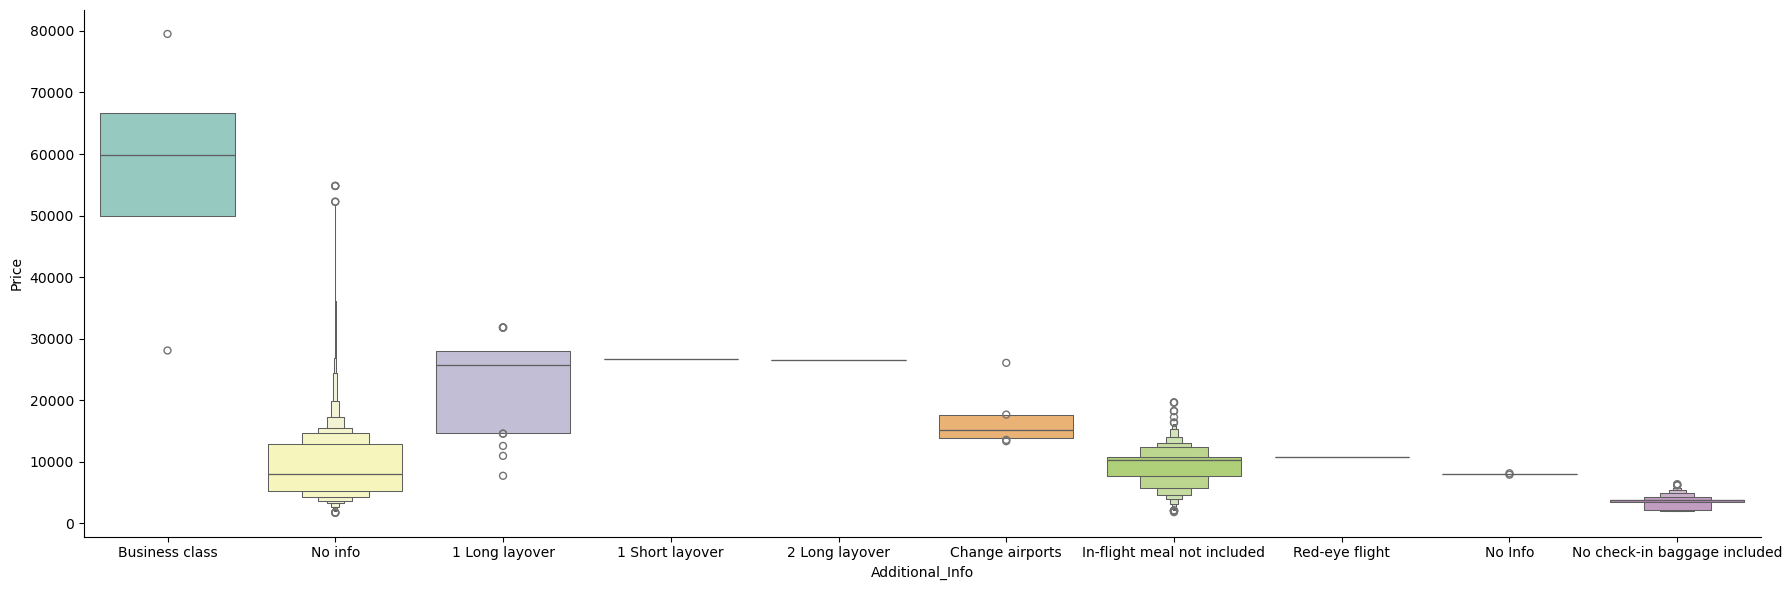

In [57]:
sns.catplot(data=data.sort_values('Price',ascending=False),x='Additional_Info',y='Price',height=6,aspect=3,kind='boxen',palette='Set3',)
plt.show()

#### Encoding for Additional_Info

In [58]:
data.Additional_Info.value_counts()

Additional_Info
No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: count, dtype: int64

In [59]:
data.replace({'No info':0,'No Info':0,'In-flight meal not included':1,'No check-in baggage included':2,'1 Long layover':3,'Change airports':4,\
             'Business class':5,'1 Short layover':6,'Red-eye flight':7,'2 Long layover':8},inplace=True)

In [60]:
data.Additional_Info.value_counts()

Additional_Info
0    8347
1    1982
2     320
3      19
4       7
5       4
6       1
7       1
8       1
Name: count, dtype: int64

In [61]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10682 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Total_Stops      10682 non-null  int64
 1   Additional_Info  10682 non-null  int64
 2   Price            10682 non-null  int64
 3   Journey_Day      10682 non-null  int32
 4   Journey_mon      10682 non-null  int32
 5   Dep_hour         10682 non-null  int32
 6   Dep_min          10682 non-null  int32
 7   Arrival_hour     10682 non-null  int32
 8   Arrival_min      10682 non-null  int32
 9   duration_hours   10682 non-null  int64
 10  duration_mins    10682 non-null  int64
dtypes: int32(6), int64(5)
memory usage: 751.1 KB


In [62]:
final_data=pd.concat([data,Airline,Source,Destination],axis=1)
pd.set_option('display.max_columns',None)
final_data

Total_Stops  Additional_Info  Price  Journey_Day  Journey_mon  \
0                0                0   3897           24            3   
1                2                0   7662            1            5   
2                2                0  13882            9            6   
3                1                0   6218           12            5   
4                1                0  13302            1            3   
...            ...              ...    ...          ...          ...   
10678            0                0   4107            9            4   
10679            0                0   4145           27            4   
10680            0                0   7229           27            4   
10681            0                0  12648            1            3   
10682            2                0  11753            9            5   

       Dep_hour  Dep_min  Arrival_hour  Arrival_min  duration_hours  \
0            22       20             1           10               2   
1             5       50            13           15               7   
2             9       25             4           25              19   
3            18        5            23           30               5   
4            16       50            21           35               4   
...         ...      ...           ...          ...             ...   
10678        19       55            22           25               2   
10679        20       45            23           20               2   
10680         8       20            11           20               3   
10681        11       30            14           10               2   
10682        10       55            19           15               8   

       duration_mins  Air India  GoAir  IndiGo  Jet Airways  \
0                 50      False  False    True        False   
1                 25       True  False   False        False   
2                  0      False  False   False         True   
3                 25      False  False    True        False   
4                 45      False  False    True        False   
...              ...        ...    ...     ...          ...   
10678             30      False  False   False        False   
10679             35       True  False   False        False   
10680              0      False  False   False         True   
10681             40      False  False   False        False   
10682             20       True  False   False        False   

       Jet Airways Business  Multiple carriers  \
0                     False              False   
1                     False              False   
2                     False              False   
3                     False              False   
4                     False              False   
...                     ...                ...   
10678                 False              False   
10679                 False              False   
10680                 False              False   
10681                 False              False   
10682                 False              False   

       Multiple carriers Premium economy  SpiceJet  Trujet  Vistara  \
0                                  False     False   False    False   
1                                  False     False   False    False   
2                                  False     False   False    False   
3                                  False     False   False    False   
4                                  False     False   False    False   
...                                  ...       ...     ...      ...   
10678                              False     False   False    False   
10679                              False     False   False    False   
10680                              False     False   False    False   
10681                              False     False   False     True   
10682                              False     False   False    False   

       Vistara Premium economy  Chennai  Delhi  Kolkata  Mumbai  Cochin  \
0  

In [63]:
final_data.shape

(10682, 31)

In [64]:
final_data.duplicated().sum()

222

In [65]:
final_data.drop_duplicates(inplace=True)

In [66]:
final_data.duplicated().sum()

0

## **Outlier Handling**
## Feature Selection

In [67]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10682 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Total_Stops      10682 non-null  int64
 1   Additional_Info  10682 non-null  int64
 2   Price            10682 non-null  int64
 3   Journey_Day      10682 non-null  int32
 4   Journey_mon      10682 non-null  int32
 5   Dep_hour         10682 non-null  int32
 6   Dep_min          10682 non-null  int32
 7   Arrival_hour     10682 non-null  int32
 8   Arrival_min      10682 non-null  int32
 9   duration_hours   10682 non-null  int64
 10  duration_mins    10682 non-null  int64
dtypes: int32(6), int64(5)
memory usage: 751.1 KB


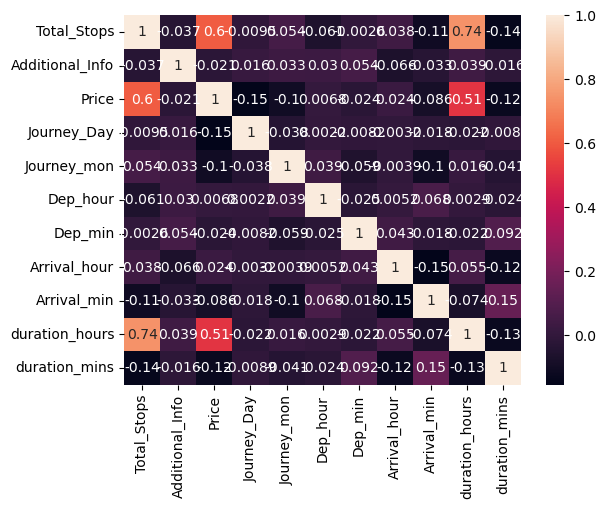

In [68]:
sns.heatmap(data.corr(),annot=True)
plt.rcParams['figure.figsize']=(70,85)
plt.show()

In [69]:
data.corr()

Total_Stops  Additional_Info     Price  Journey_Day  \
Total_Stops         1.000000        -0.036591  0.603897    -0.009451   
Additional_Info    -0.036591         1.000000 -0.020781     0.016390   
Price               0.603897        -0.020781  1.000000    -0.153774   
Journey_Day        -0.009451         0.016390 -0.153774     1.000000   
Journey_mon         0.054383         0.032580 -0.103643    -0.038359   
Dep_hour           -0.061476         0.029617  0.006799     0.002170   
Dep_min            -0.002618         0.054406 -0.024458    -0.008170   
Arrival_hour        0.038140        -0.065796  0.024244    -0.003245   
Arrival_min        -0.106940        -0.033389 -0.086155    -0.017510   
duration_hours      0.739916         0.038767  0.508778    -0.022059   
duration_mins      -0.136706        -0.015997 -0.124855    -0.008940   

                 Journey_mon  Dep_hour   Dep_min  Arrival_hour  Arrival_min  \
Total_Stops         0.054383 -0.061476 -0.002618      0.038140    -0.106940   
Additional_Info     0.032580  0.029617  0.054406     -0.065796    -0.033389   
Price              -0.103643  0.006799 -0.024458      0.024244    -0.086155   
Journey_Day        -0.038359  0.002170 -0.008170     -0.003245    -0.017510   
Journey_mon         1.000000  0.039127 -0.059267     -0.003927    -0.100626   
Dep_hour            0.039127  1.000000 -0.024745      0.005180     0.067911   
Dep_min            -0.059267 -0.024745  1.000000      0.043122    -0.017597   
Arrival_hour       -0.003927  0.005180  0.043122      1.000000    -0.154363   
Arrival_min        -0.100626  0.067911 -0.017597     -0.154363     1.000000   
duration_hours      0.016141  0.002869 -0.022104      0.055276    -0.074450   
duration_mins      -0.040897 -0.023707  0.092485     -0.118309     0.151628   

                 duration_hours  duration_mins  
Total_Stops            0.739916      -0.136706  
Additional_Info        0.038767      -0.015997  
Price                  0.508778      -0.124855  
Journey_Day           -0.022059      -0.008940  
Journey_mon            0.016141      -0.040897  
Dep_hour               0.002869      -0.023707  
Dep_min               -0.022104       0.092485  
Arrival_hour           0.055276      -0.118309  
Arrival_min           -0.074450       0.151628  
duration_hours         1.000000      -0.126468  
duration_mins         -0.126468       1.000000

In [70]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10460 entries, 0 to 10682
Data columns (total 31 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Total_Stops                        10460 non-null  int64
 1   Additional_Info                    10460 non-null  int64
 2   Price                              10460 non-null  int64
 3   Journey_Day                        10460 non-null  int32
 4   Journey_mon                        10460 non-null  int32
 5   Dep_hour                           10460 non-null  int32
 6   Dep_min                            10460 non-null  int32
 7   Arrival_hour                       10460 non-null  int32
 8   Arrival_min                        10460 non-null  int32
 9   duration_hours                     10460 non-null  int64
 10  duration_mins                      10460 non-null  int64
 11  Air India                          10460 non-null  bool 
 12  GoAir                  

## Model Creation
#### Test Split and Train Data

In [71]:
final_data.columns

Index(['Total_Stops', 'Additional_Info', 'Price', 'Journey_Day', 'Journey_mon',
       'Dep_hour', 'Dep_min', 'Arrival_hour', 'Arrival_min', 'duration_hours',
       'duration_mins', 'Air India', 'GoAir', 'IndiGo', 'Jet Airways',
       'Jet Airways Business', 'Multiple carriers',
       'Multiple carriers Premium economy', 'SpiceJet', 'Trujet', 'Vistara',
       'Vistara Premium economy', 'Chennai', 'Delhi', 'Kolkata', 'Mumbai',
       'Cochin', 'Delhi', 'Hyderabad', 'Kolkata', 'New Delhi'],
      dtype='object')

In [72]:
x=final_data.drop(columns=["Price"],axis=1)
y=final_data.Price

## _Splitting the Data_

In [73]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=25)

## _Creating a Model_

In [74]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor,GradientBoostingRegressor
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

In [75]:
# Creating a def function for model training and testing
def predict(reg_model):       
    print(f'Model Name : {reg_model}') 
    model=reg_model.fit(x_train,y_train) 
    print(f'Training Score : {model.score(x_train,y_train)}')
    predict_value=model.predict(x_test) 
    print(f'Prediction values : {predict_value}')
    print('\n')
    r2score=r2_score(y_test,predict_value)
    r2_rounded=round(r2score,2) 
    print(f'R2_score is : {r2score}')
    print('\n')
    num_of_row=x_test.shape[0] 
    num_of_col=x_test.shape[1]
    adjusted_r2=1-(((1-r2_rounded)*(num_of_row-1))/(num_of_row-num_of_col-1))
    print(f'Adjusted R2 Score is : {adjusted_r2}')
    print('\n')
    print(f'MSE is : {mean_squared_error(y_test,predict_value)}')
    print(f'MAE is : {mean_absolute_error(y_test,predict_value)}') 
    print(f'RMSE is : {np.sqrt(mean_squared_error(y_test,predict_value))}') 
    sns.distplot(y_test-predict_value)
    plt.show()

# Linear Regression

Model Name : LinearRegression()
Training Score : 0.6438646013498724
Prediction values : [ 6431.61325786 13809.53061461  9055.22578886 ...  3758.03661777
 11156.212783    4182.94440201]


R2_score is : 0.6235227041515081


Adjusted R2 Score is : 0.6163308657869327


MSE is : 7222040.8898383835
MAE is : 1924.3512465326603
RMSE is : 2687.3855119499294


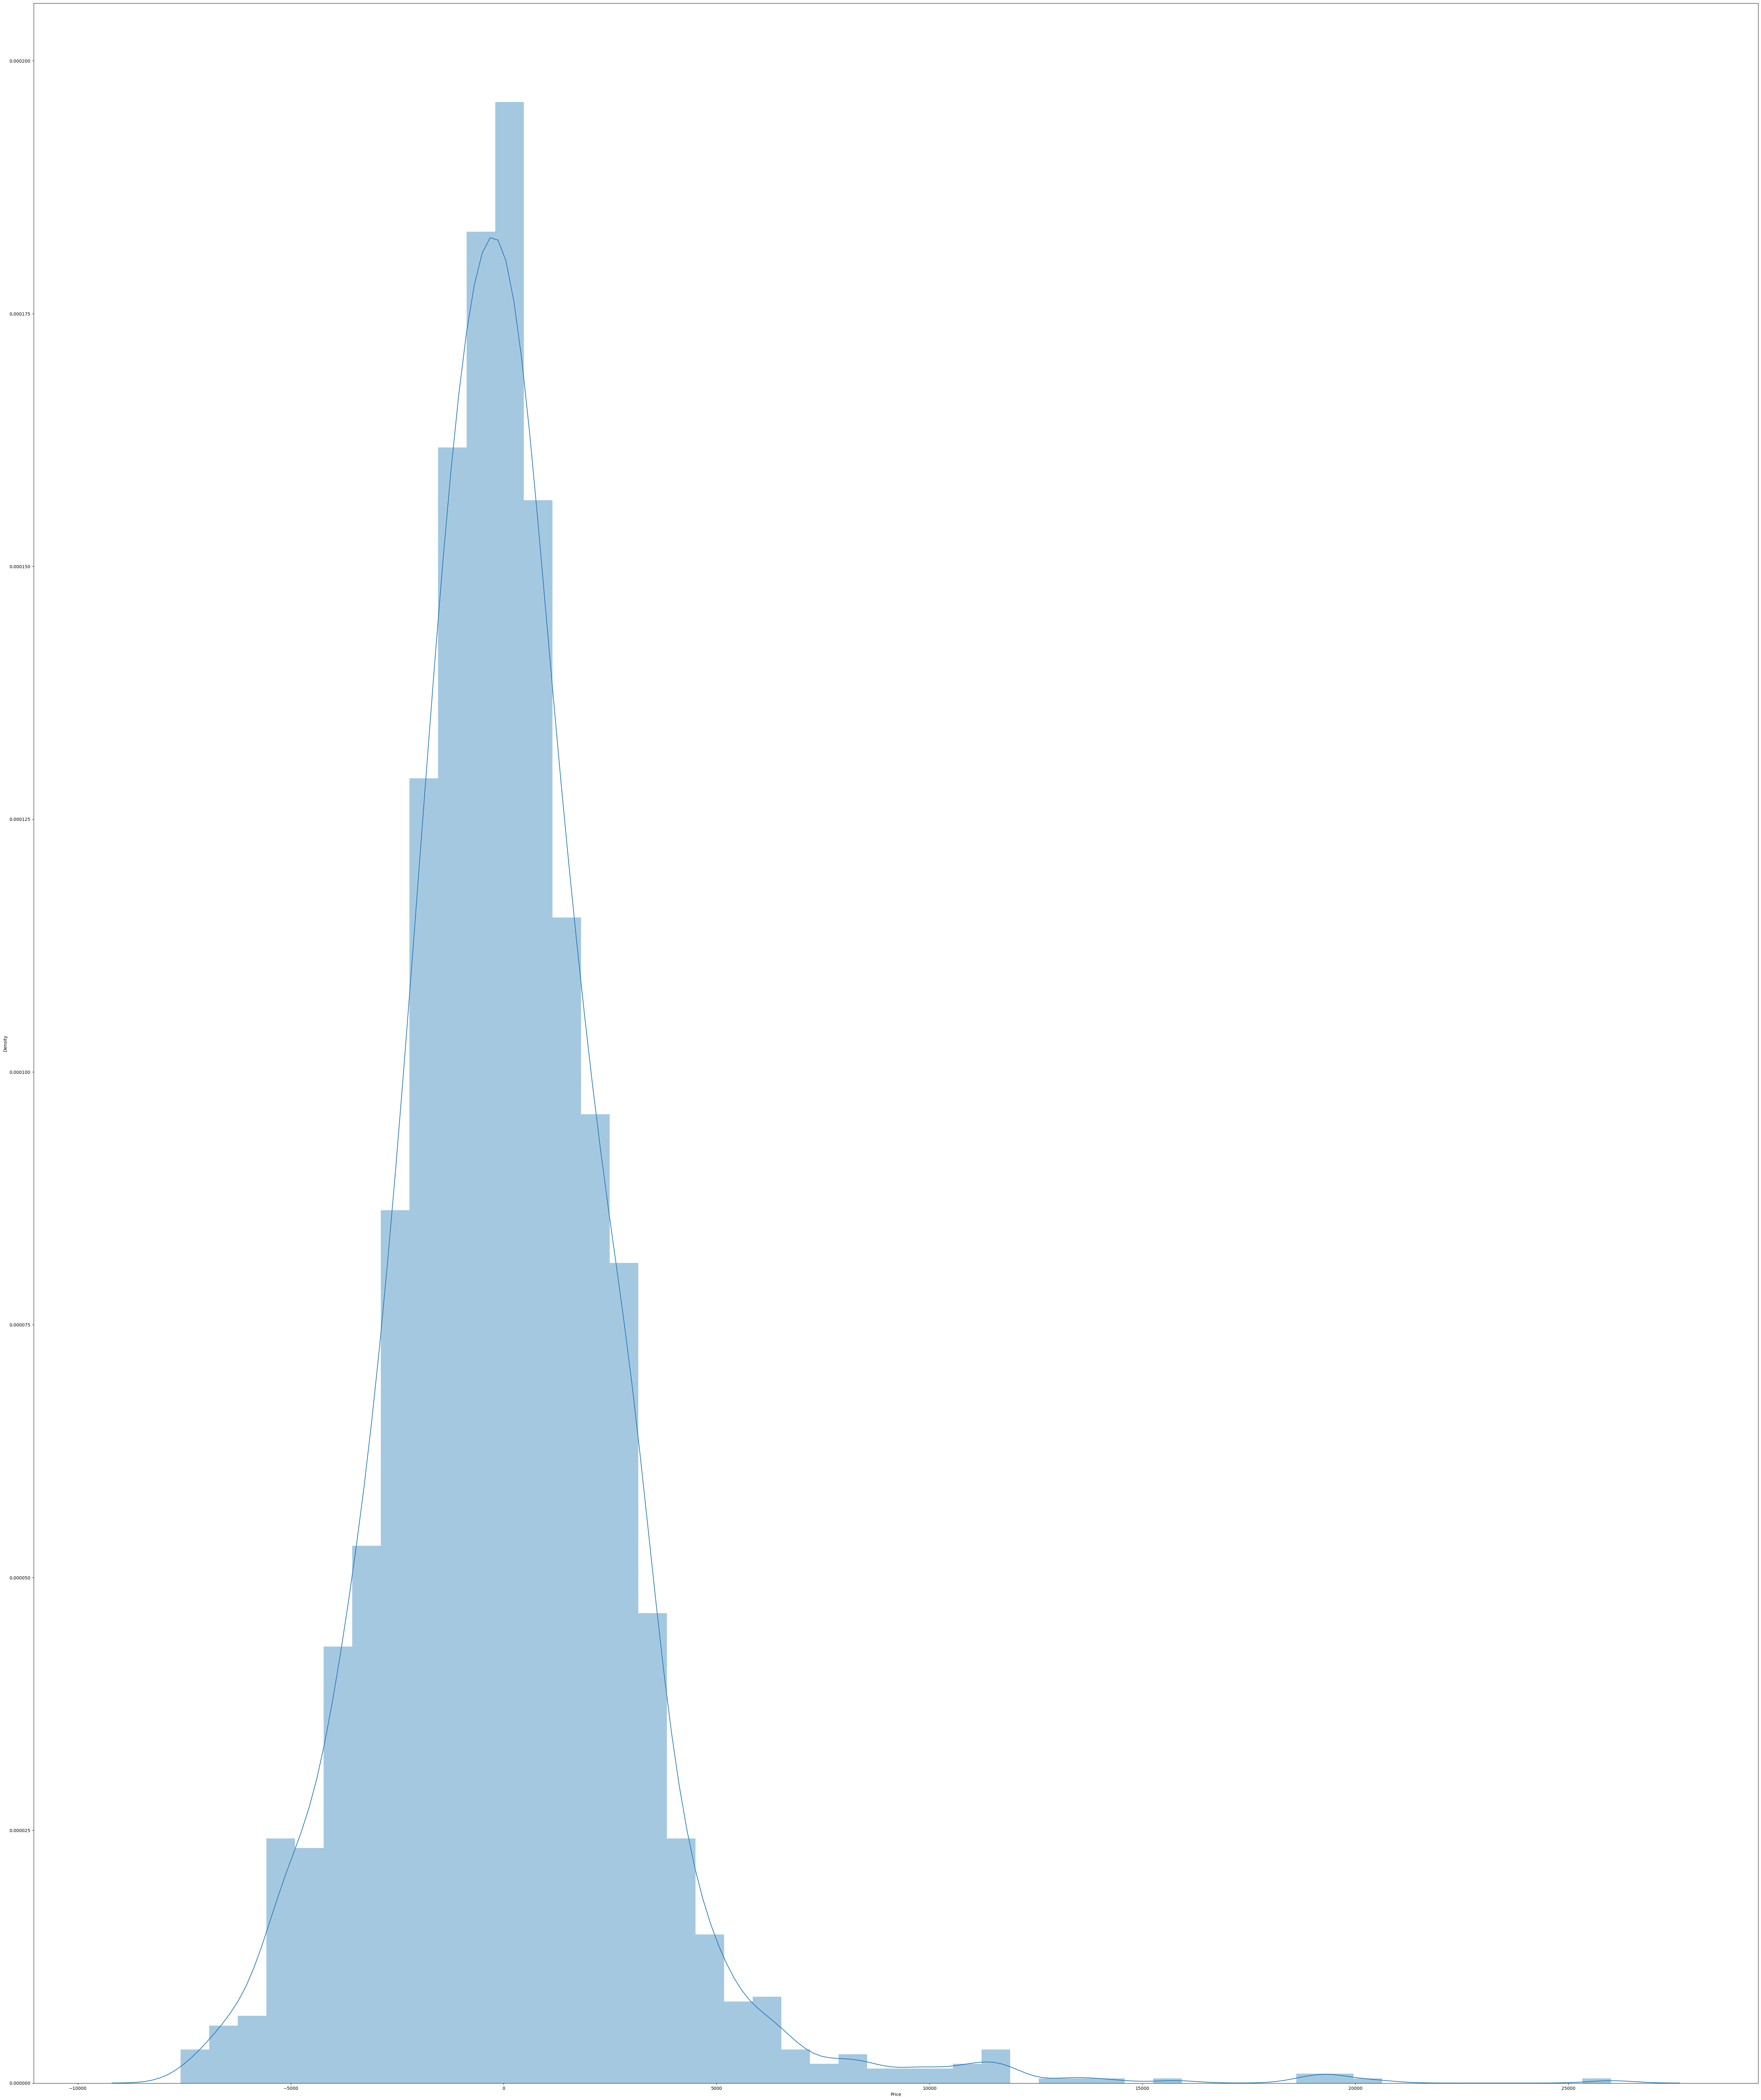

In [76]:
predict(LinearRegression())

# KNN Regressor

Model Name : KNeighborsRegressor()
Training Score : 0.7338221033909226
Prediction values : [ 5120.4 13176.2  5607.  ...  4856.4 13202.2  5537.8]


R2_score is : 0.5933780562173638


Adjusted R2 Score is : 0.5860411972964275


MSE is : 7800311.830452518
MAE is : 1844.3497131931167
RMSE is : 2792.903834802143


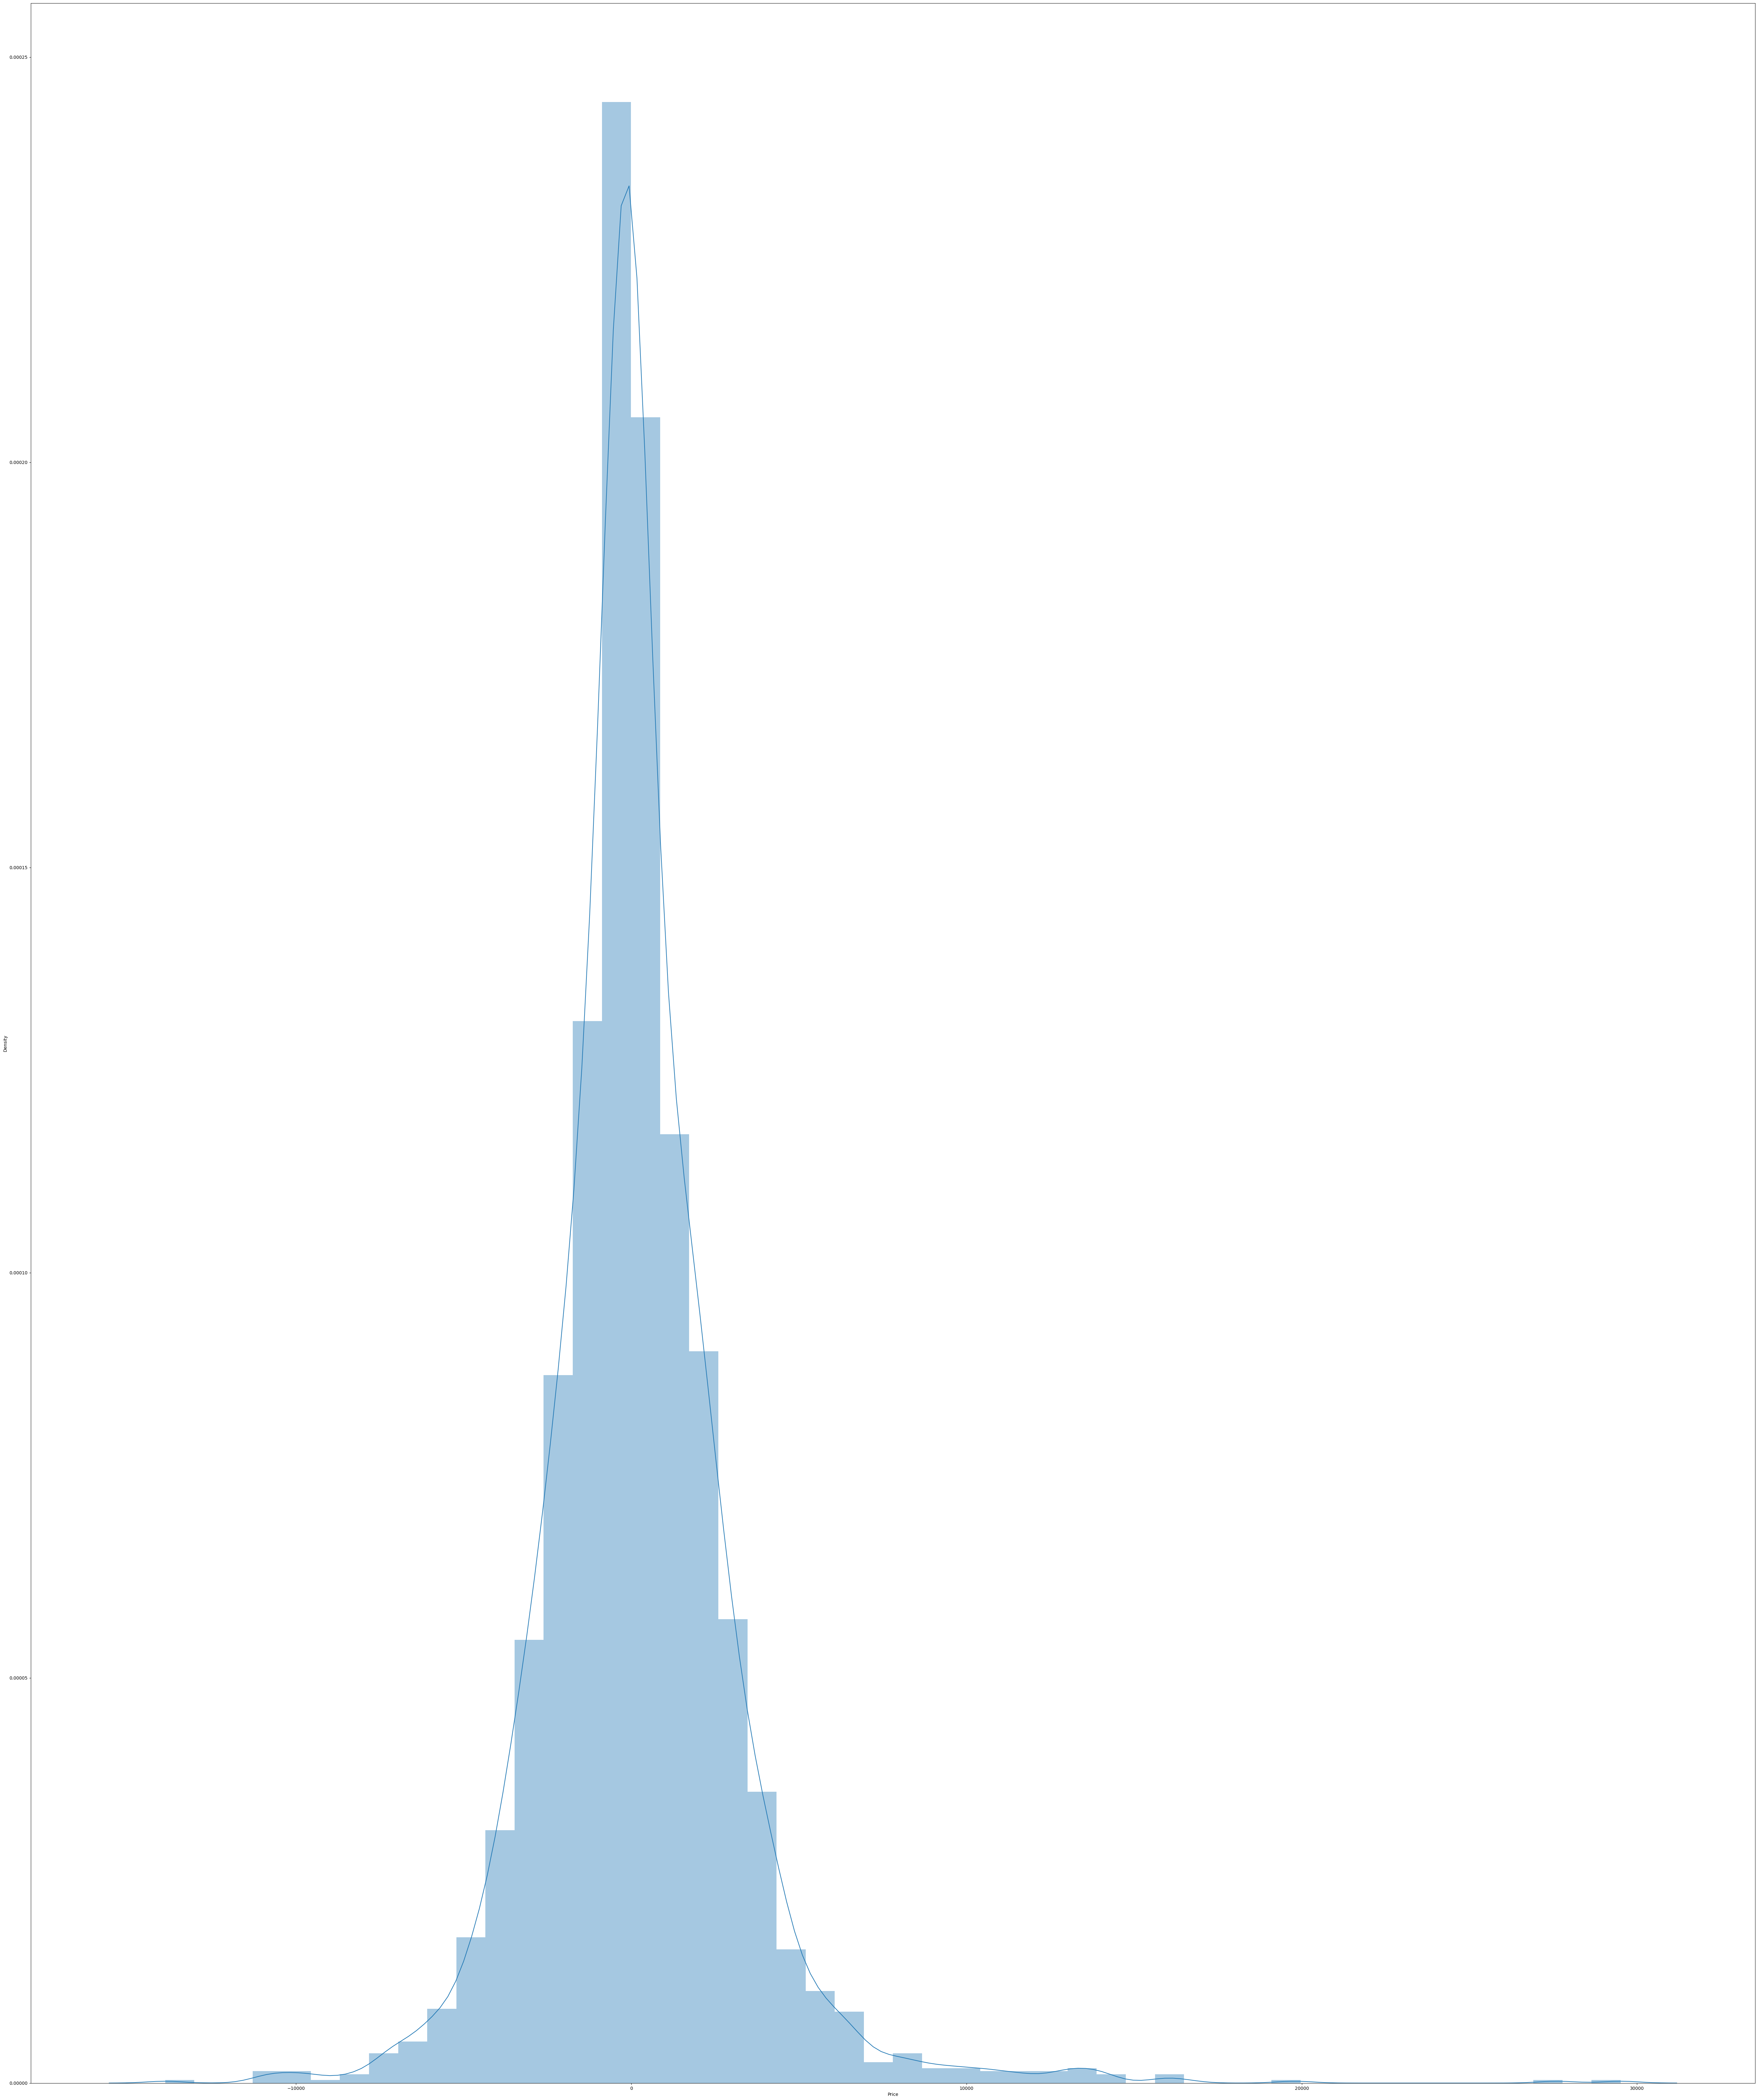

In [77]:
predict(KNeighborsRegressor())

# Support Vector Regressor

Model Name : SVR()
Training Score : -0.0038992142925537987
Prediction values : [8092.37393897 8428.0394842  8103.89522704 ... 8181.19303156 8327.27711737
 8067.76507701]


R2_score is : 0.003656623389448499


Adjusted R2 Score is : -0.009655616350177088


MSE is : 19113058.57099237
MAE is : 3539.34231794869
RMSE is : 4371.848415829667


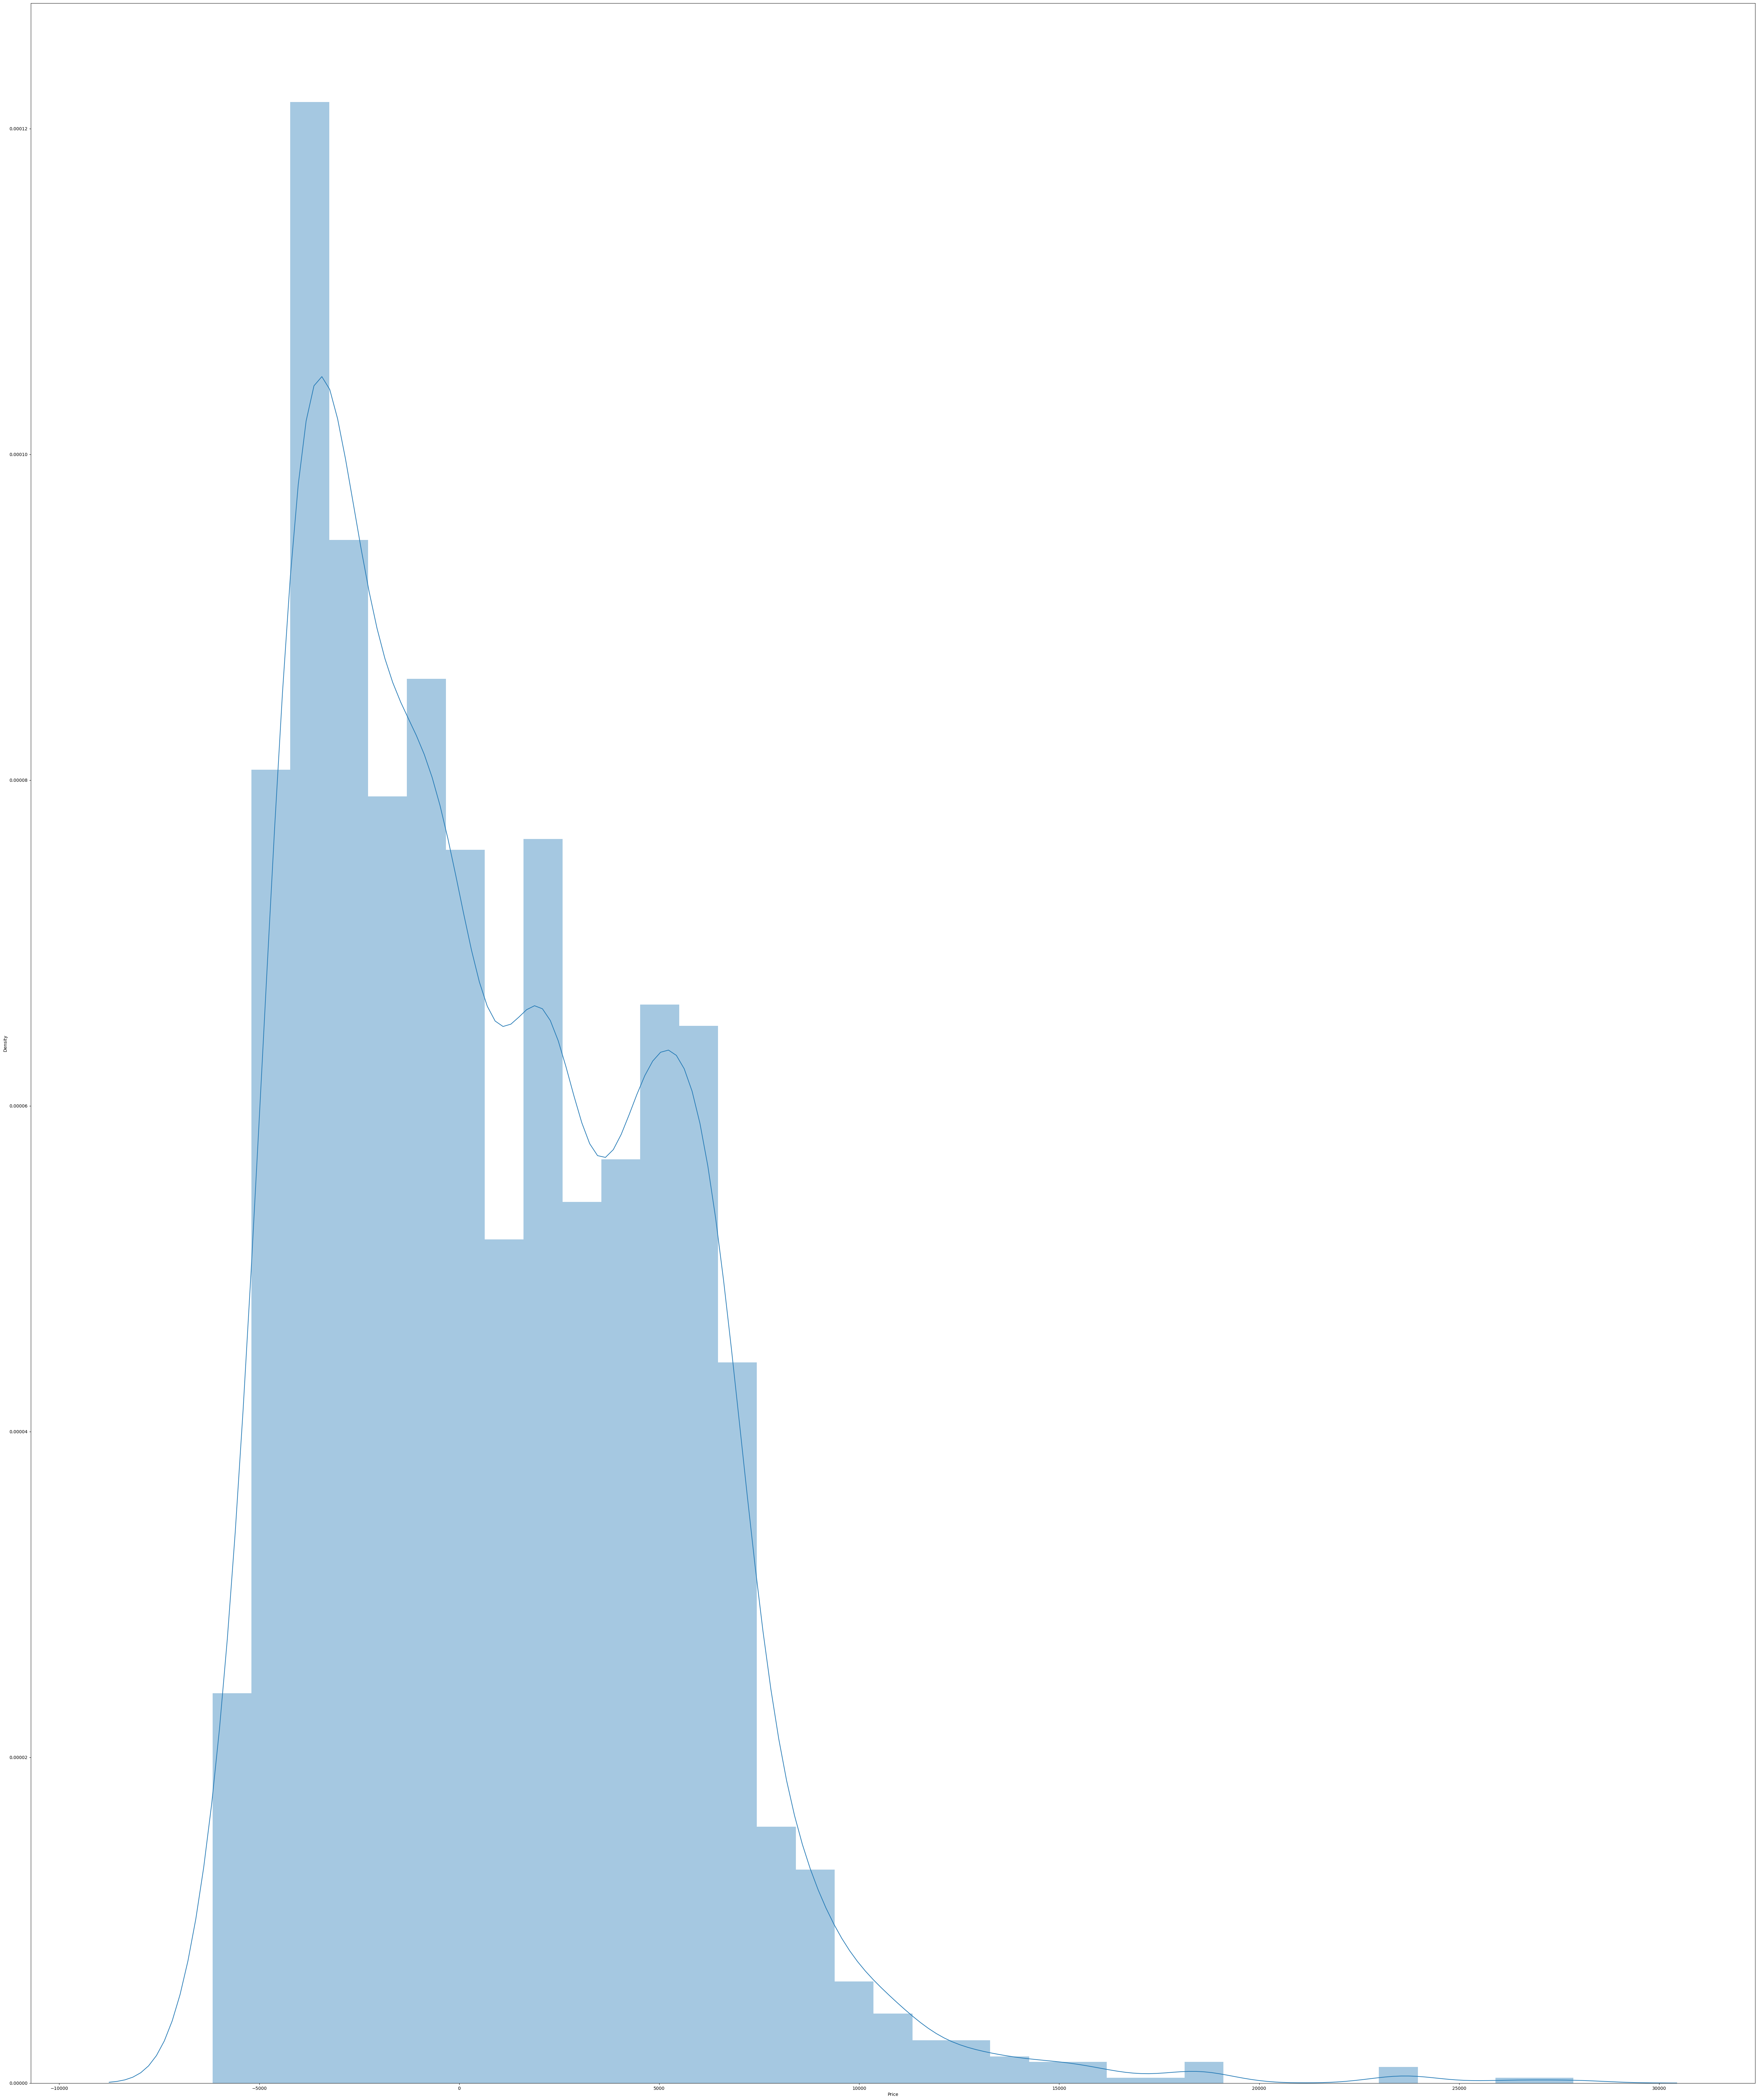

In [78]:
predict(SVR())

# Decision Tree regressor

Model Name : DecisionTreeRegressor()
Training Score : 0.9965469691221183
Prediction values : [ 4544. 10493.  7229. ...  4990. 10262.  7120.]


R2_score is : 0.7655767037504192


Adjusted R2 Score is : 0.7677792082394592


MSE is : 4496989.990404363
MAE is : 850.6545570427023
RMSE is : 2120.6107588155737


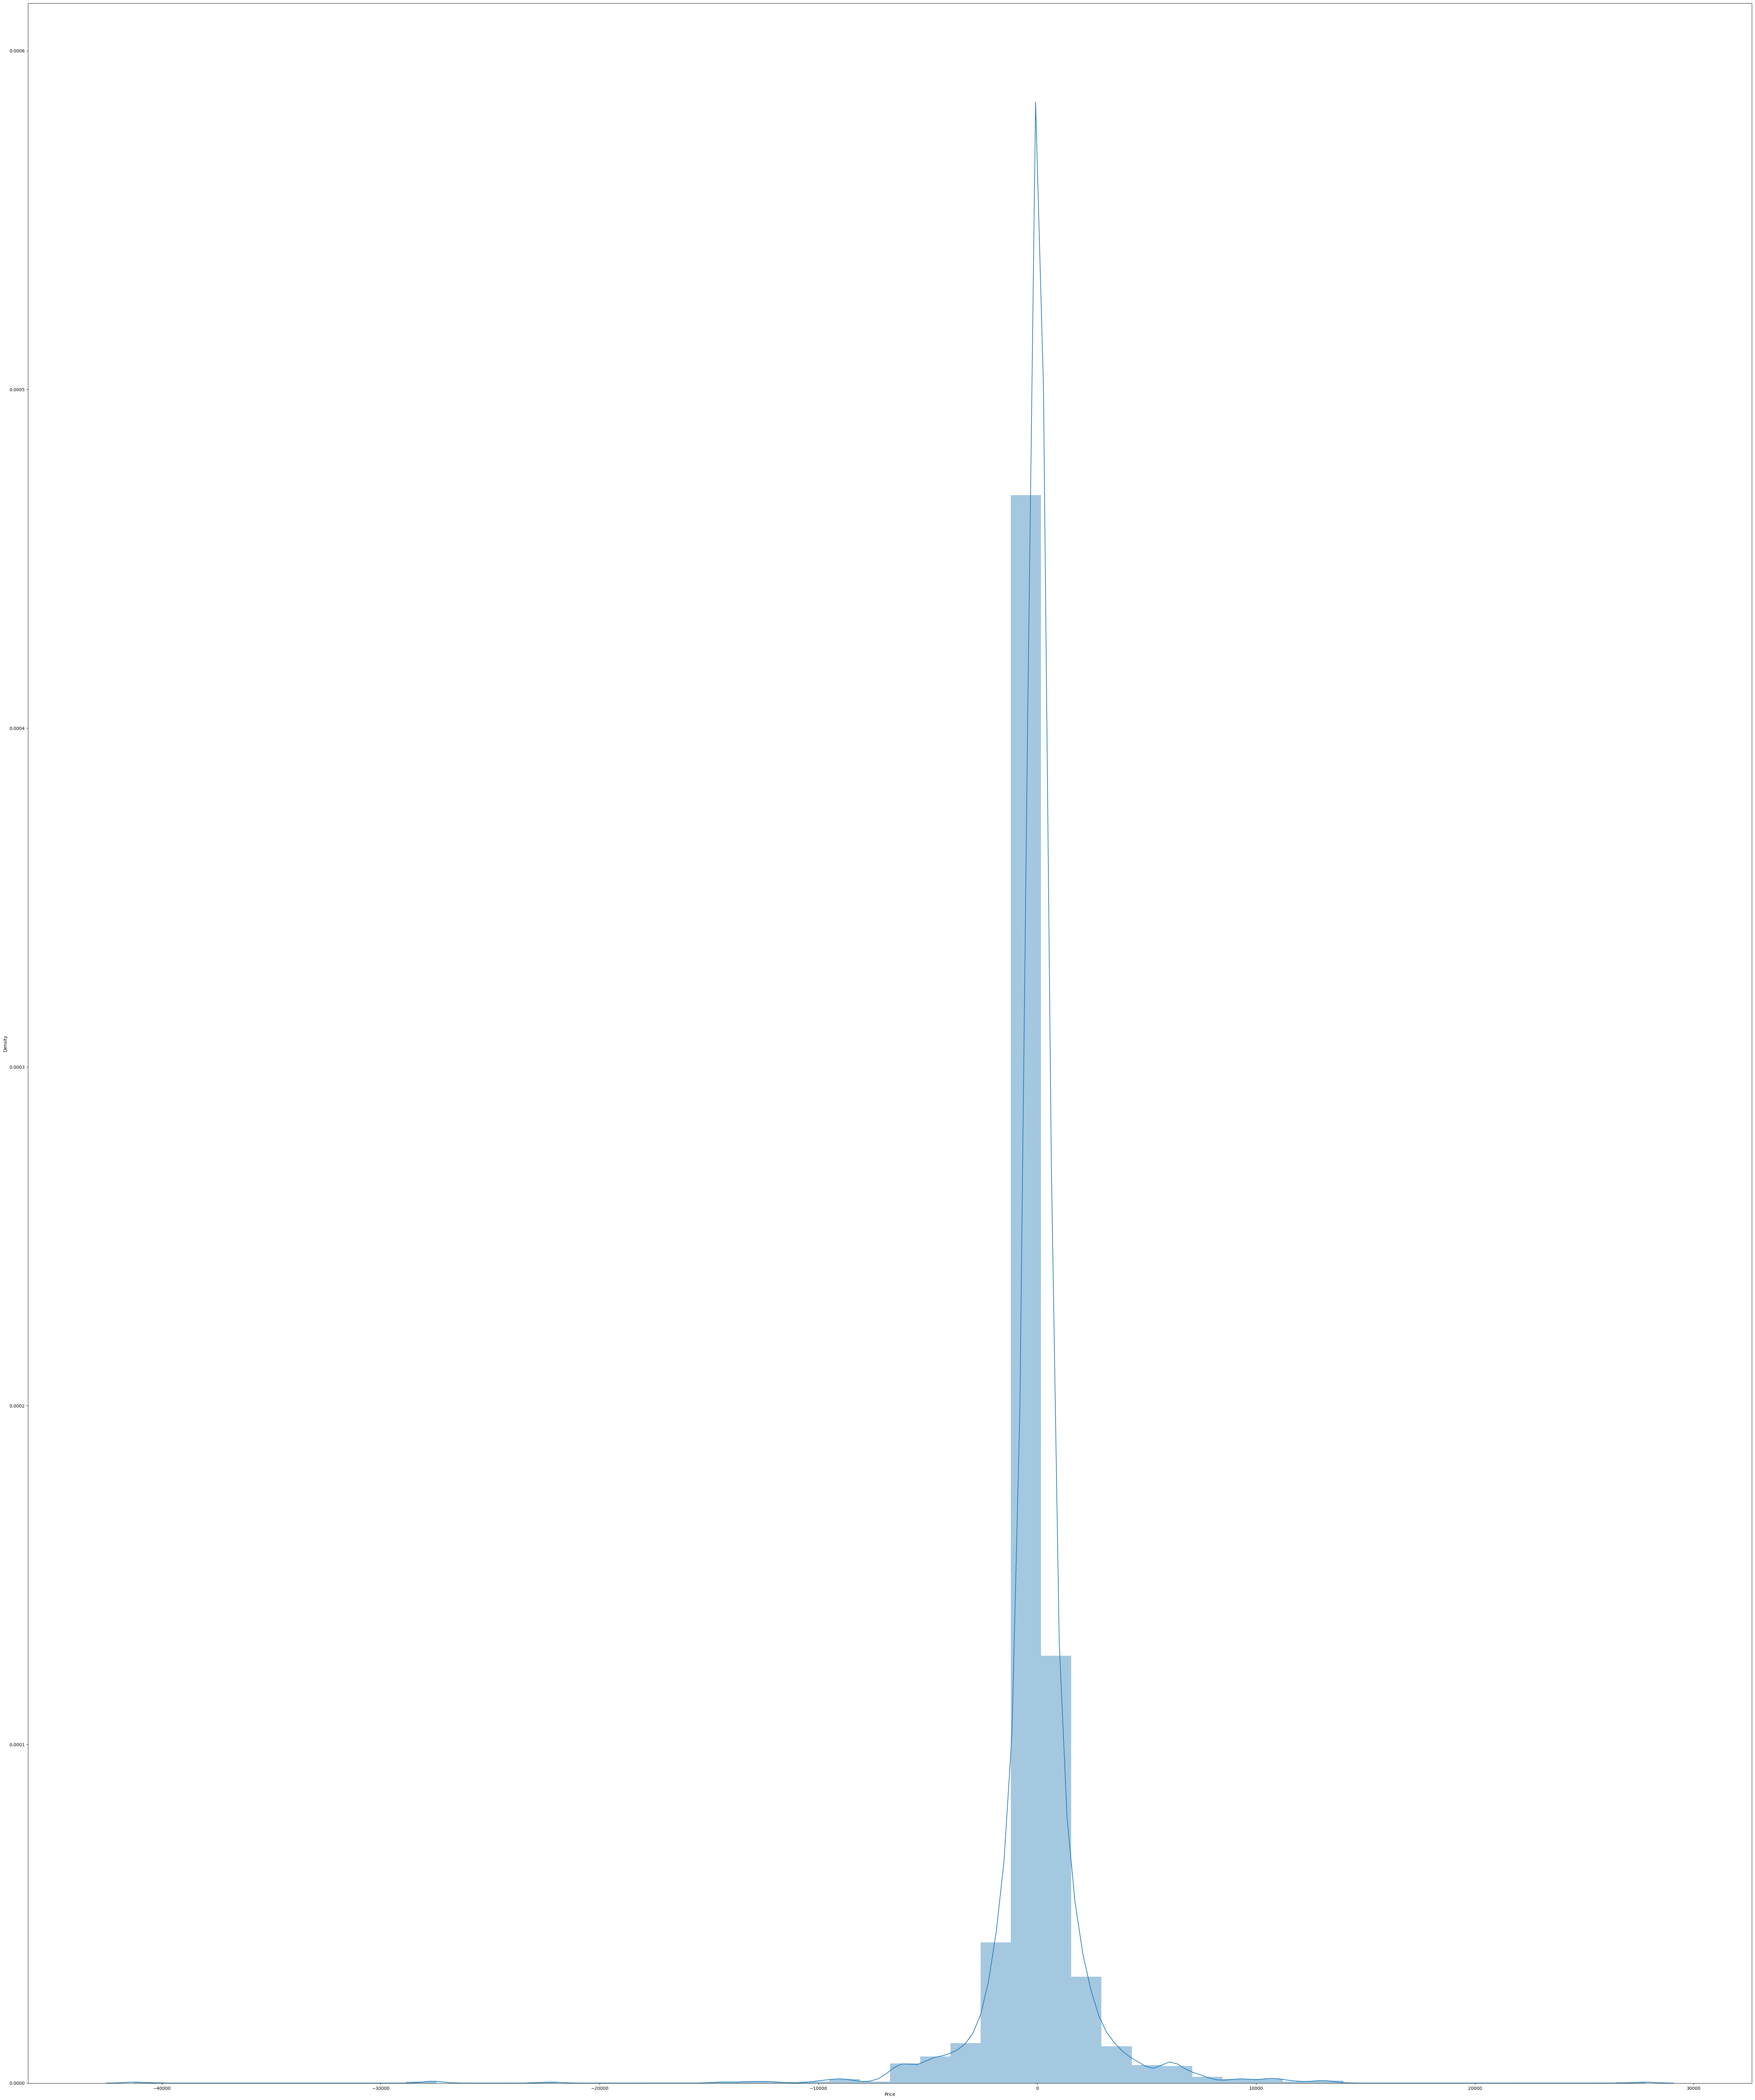

In [79]:
predict(DecisionTreeRegressor())

# RandomForest Regressor

Model Name : RandomForestRegressor()
Training Score : 0.9820014669661207
Prediction values : [ 4193.99 11195.07  7306.62 ...  4889.48 10284.05  5232.15]


R2_score is : 0.8783654218499468


Adjusted R2 Score is : 0.8788413260379788


MSE is : 2333340.96559025
MAE is : 722.0295907753903
RMSE is : 1527.527729892407


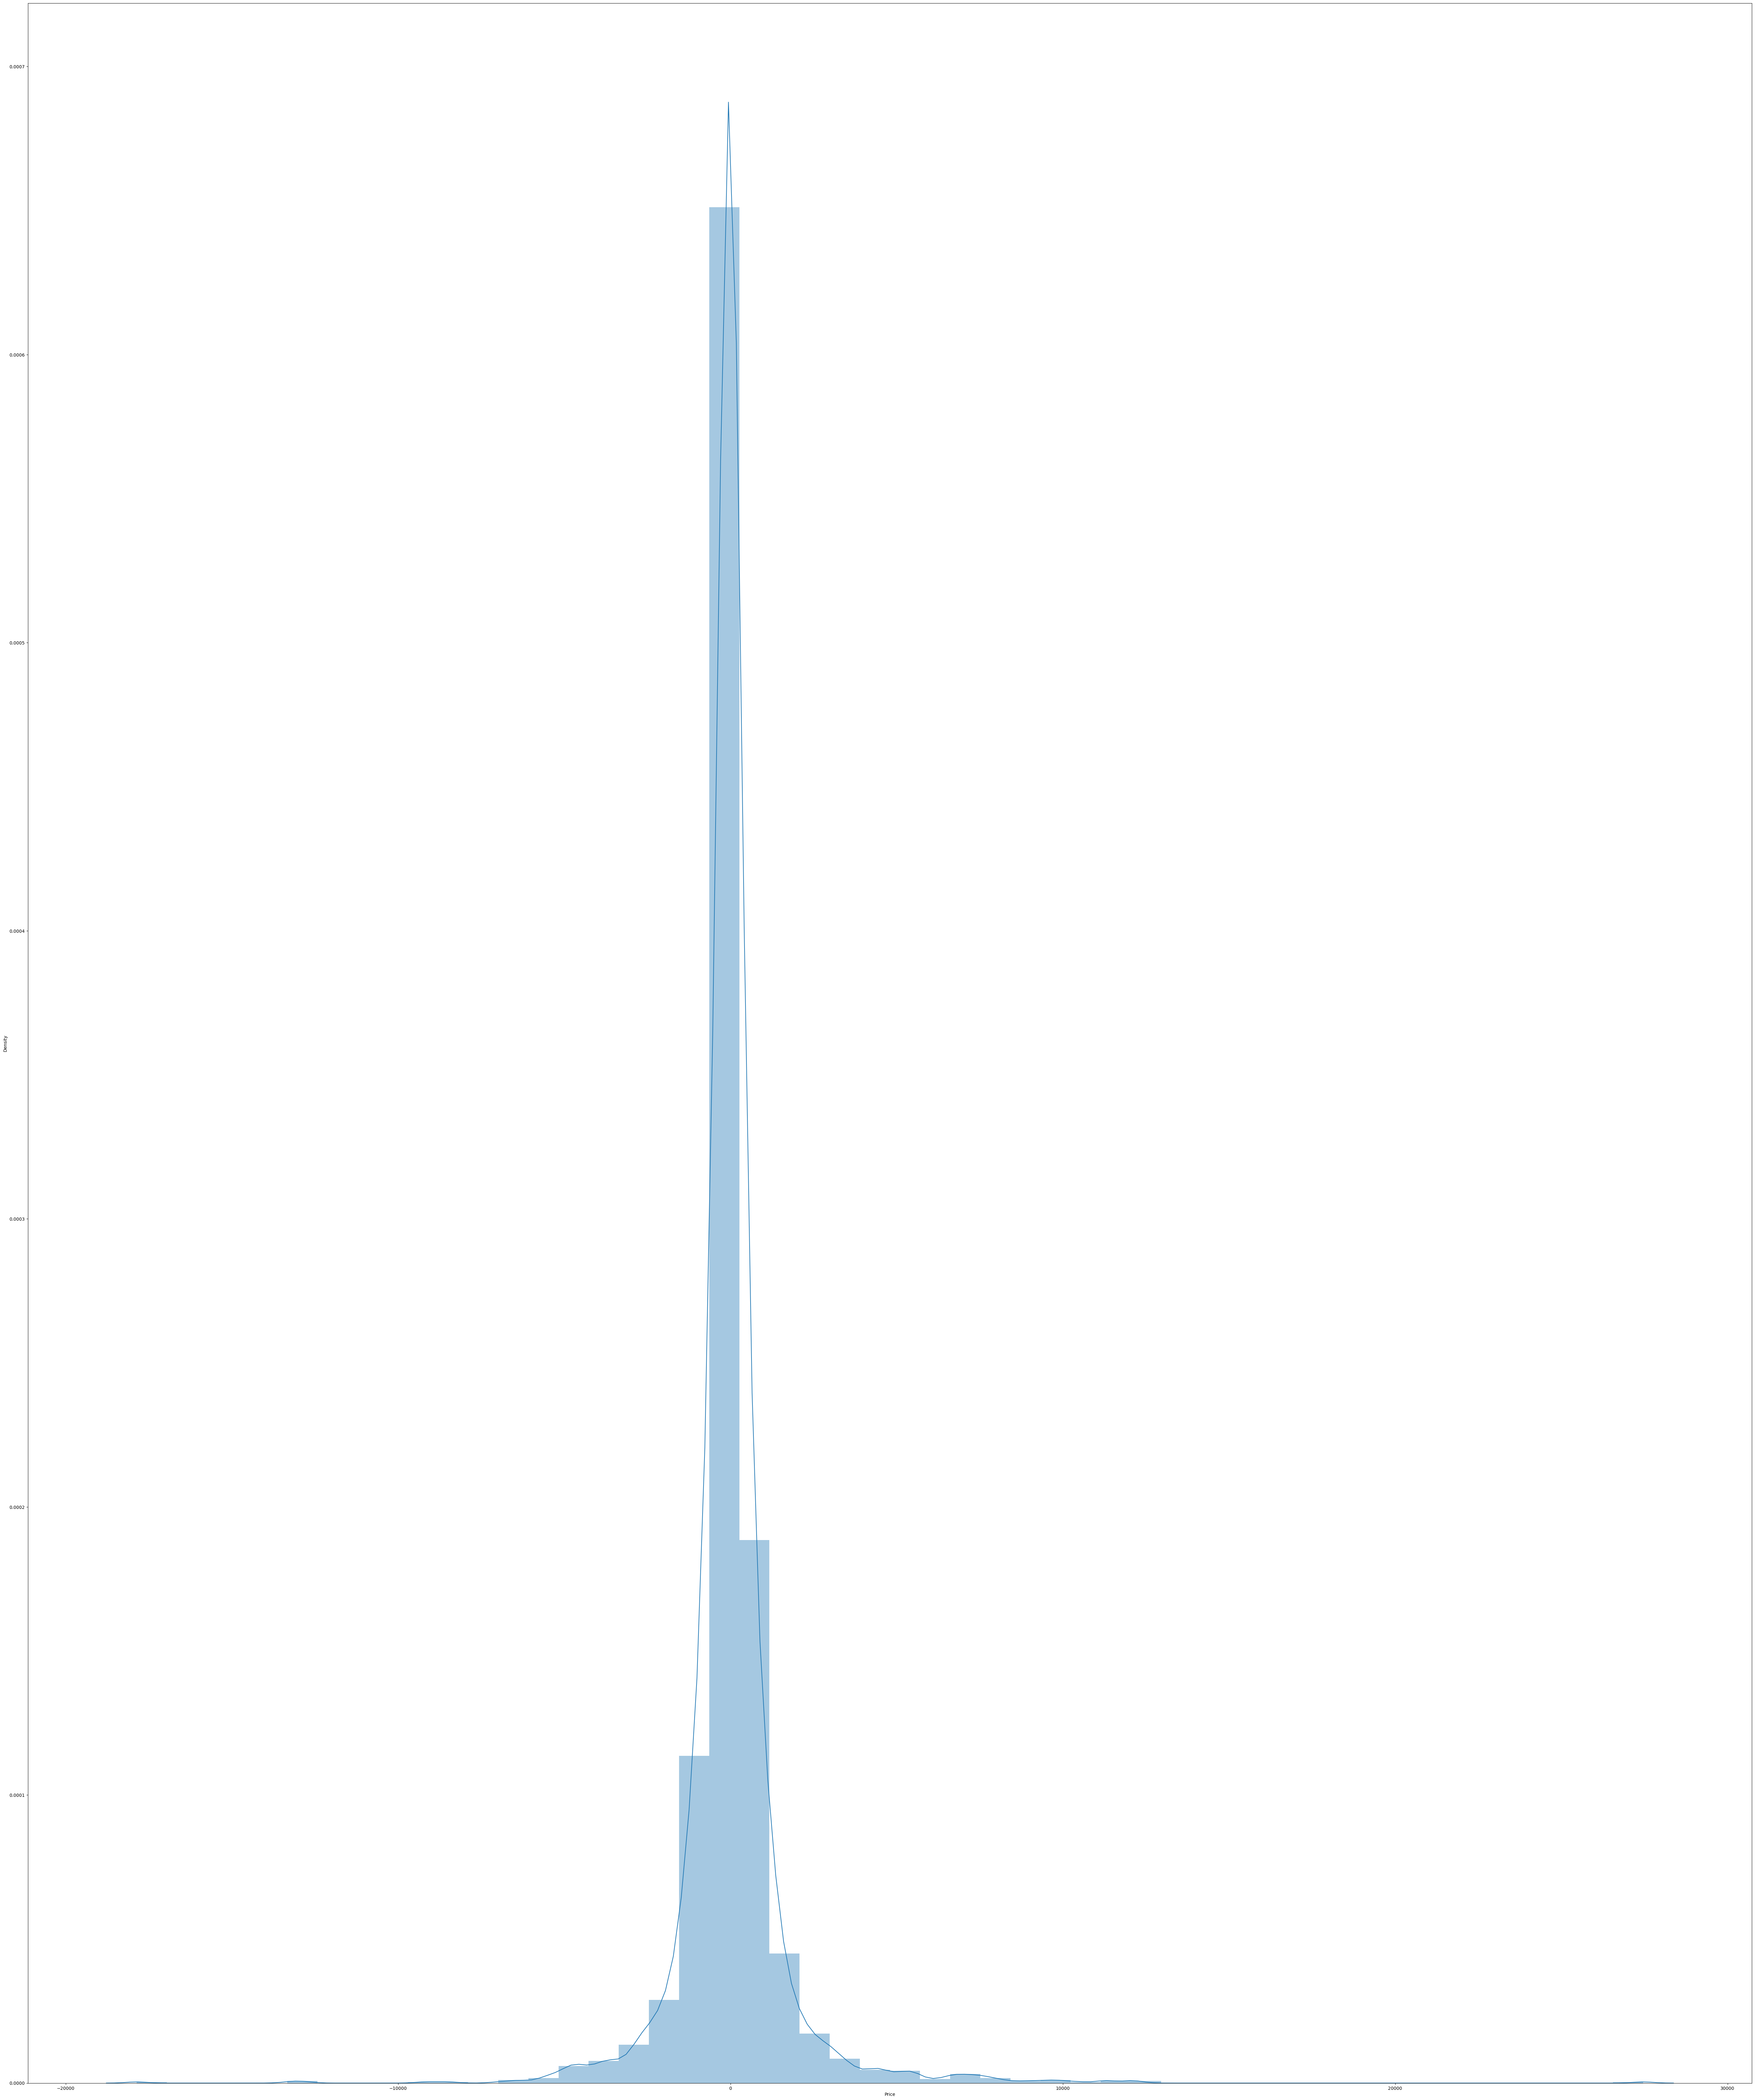

In [80]:
predict(RandomForestRegressor())

# GradientBoosting Regressor

Model Name : GradientBoostingRegressor()
Training Score : 0.8376345809946502
Prediction values : [ 5603.18733215 11183.52703214  7456.98674032 ...  4781.87895108
 10699.04315293  5034.79223944]


R2_score is : 0.8103380408991033


Adjusted R2 Score is : 0.8081654328934664


MSE is : 3638324.1140383845
MAE is : 1270.894196716594
RMSE is : 1907.4391508088495


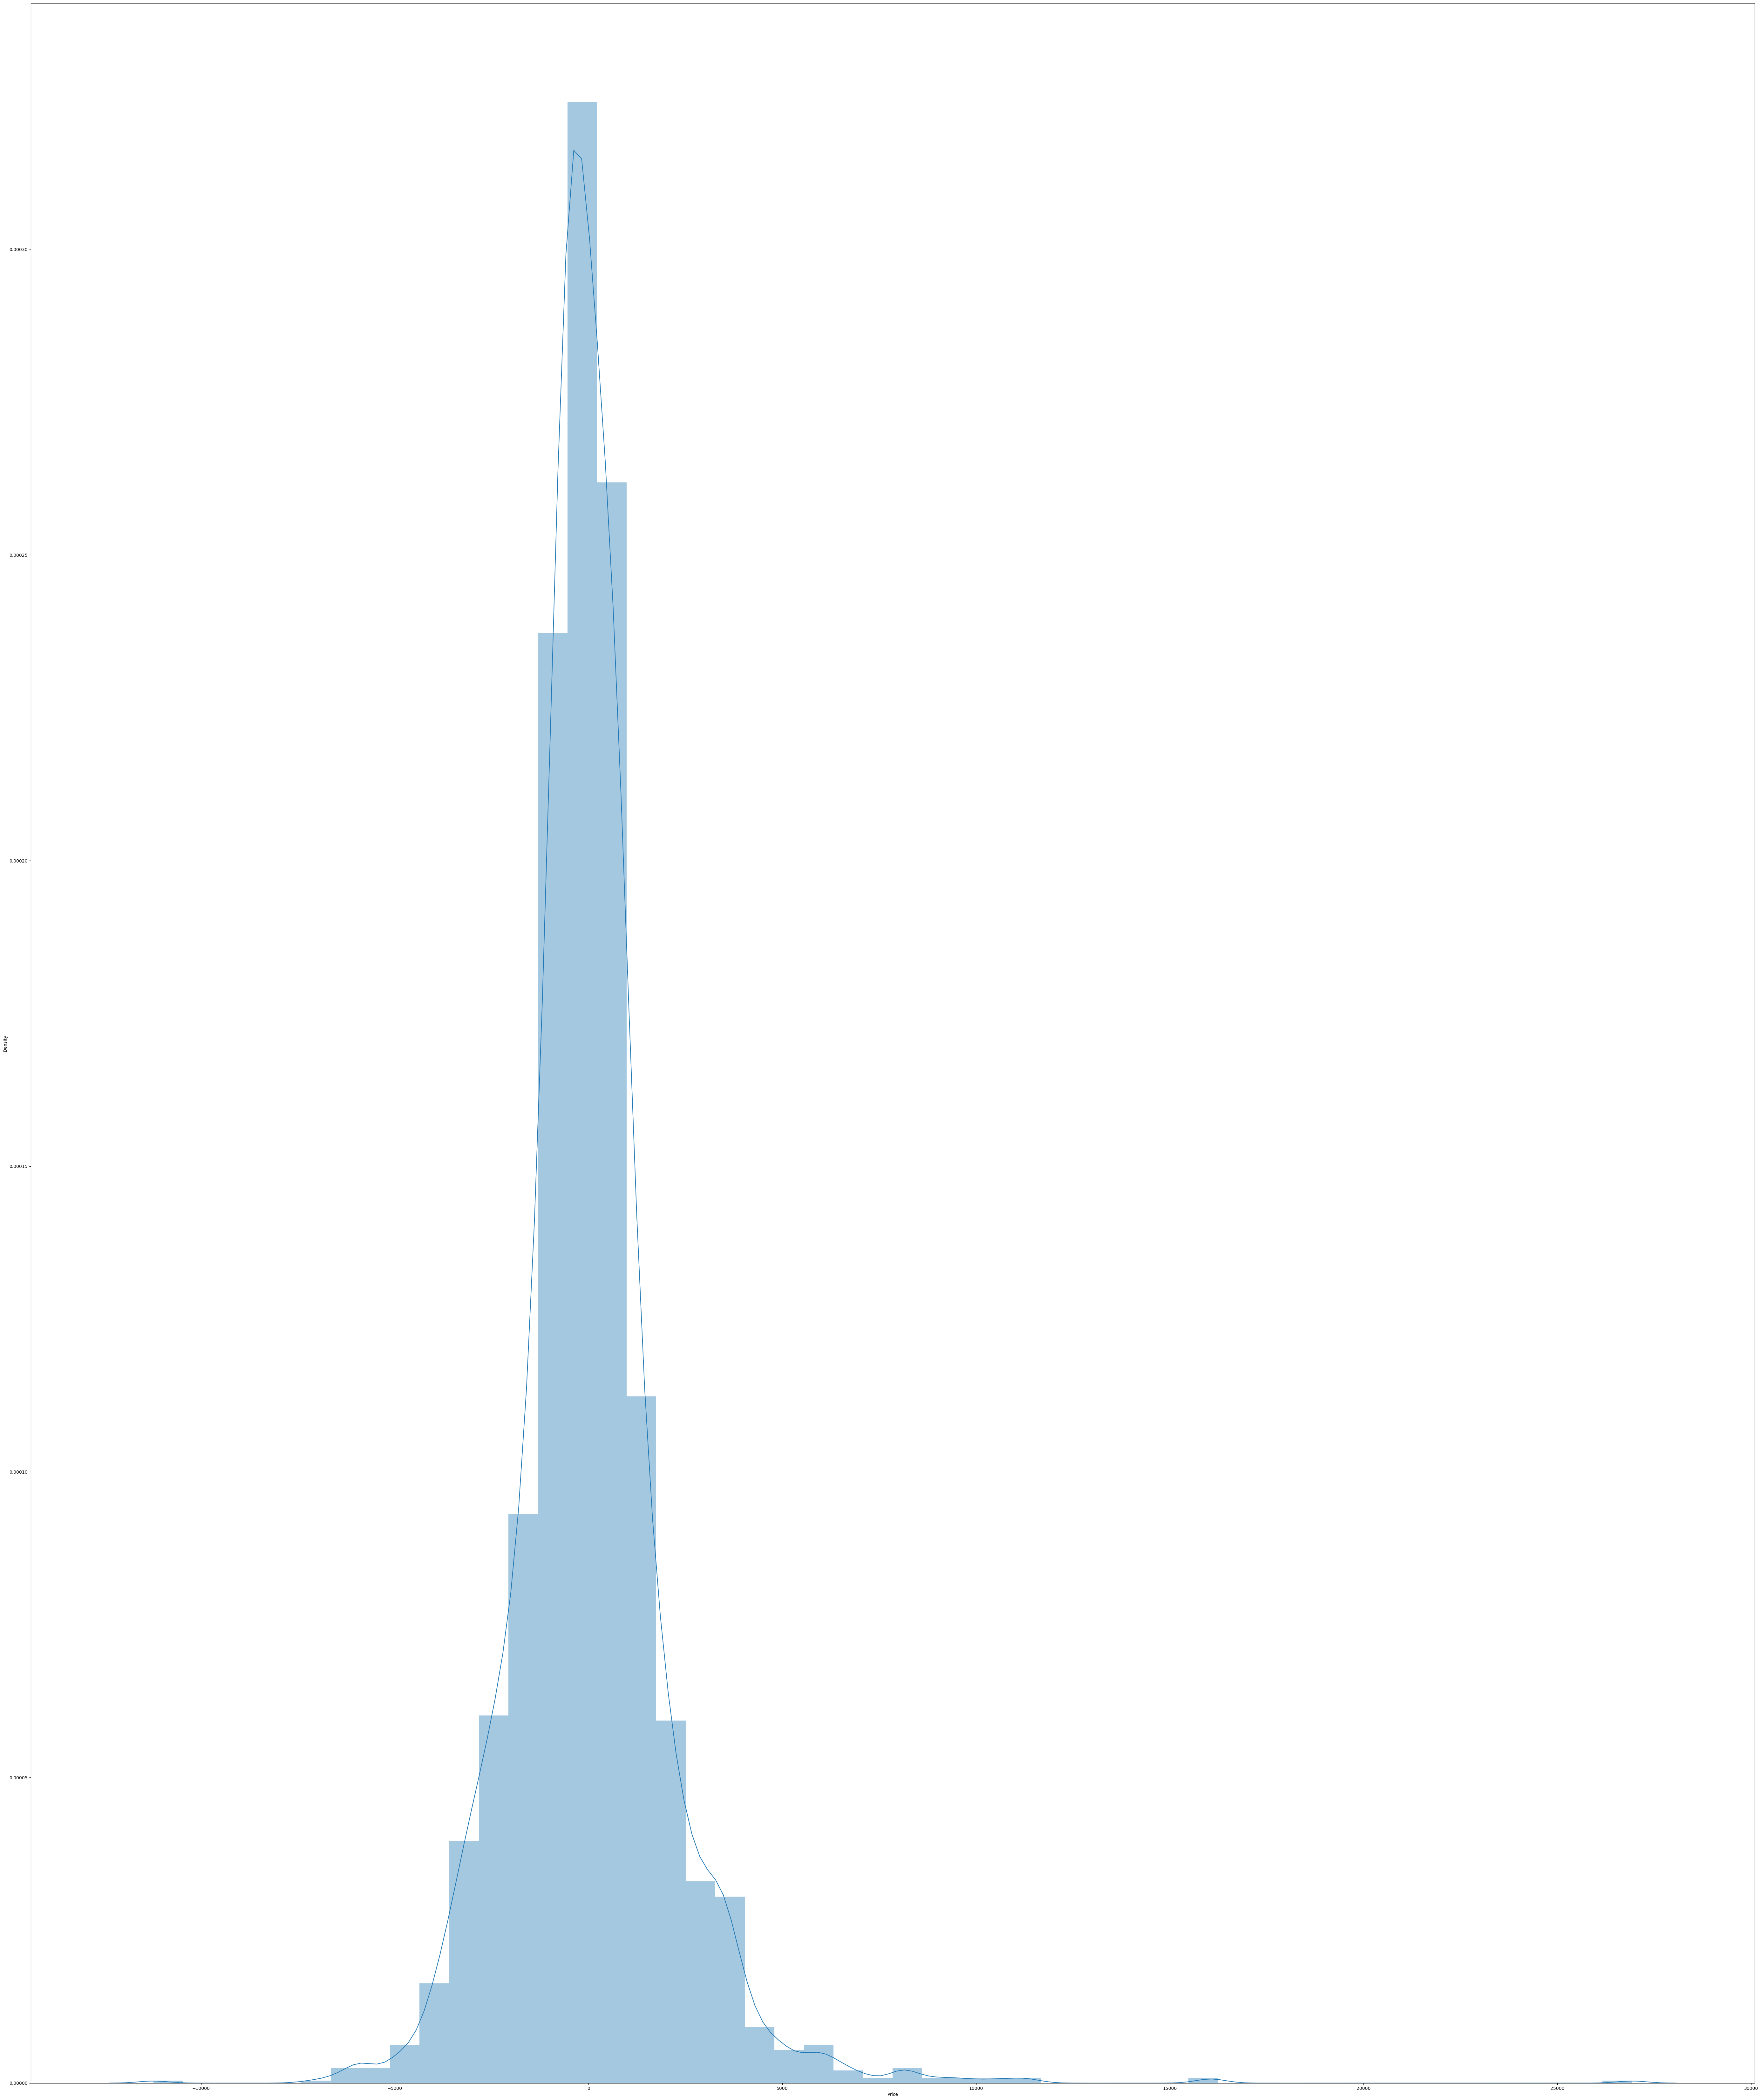

In [81]:
predict(GradientBoostingRegressor())

# Bagging Regressor

Model Name : BaggingRegressor()
Training Score : 0.9706230439578
Prediction values : [ 4081.4 11511.6  7229.  ...  4800.9 10325.   5274.1]


R2_score is : 0.864074940256252


Adjusted R2 Score is : 0.8586482137109752


MSE is : 2607478.193899183
MAE is : 742.2347862226471
RMSE is : 1614.768774128105


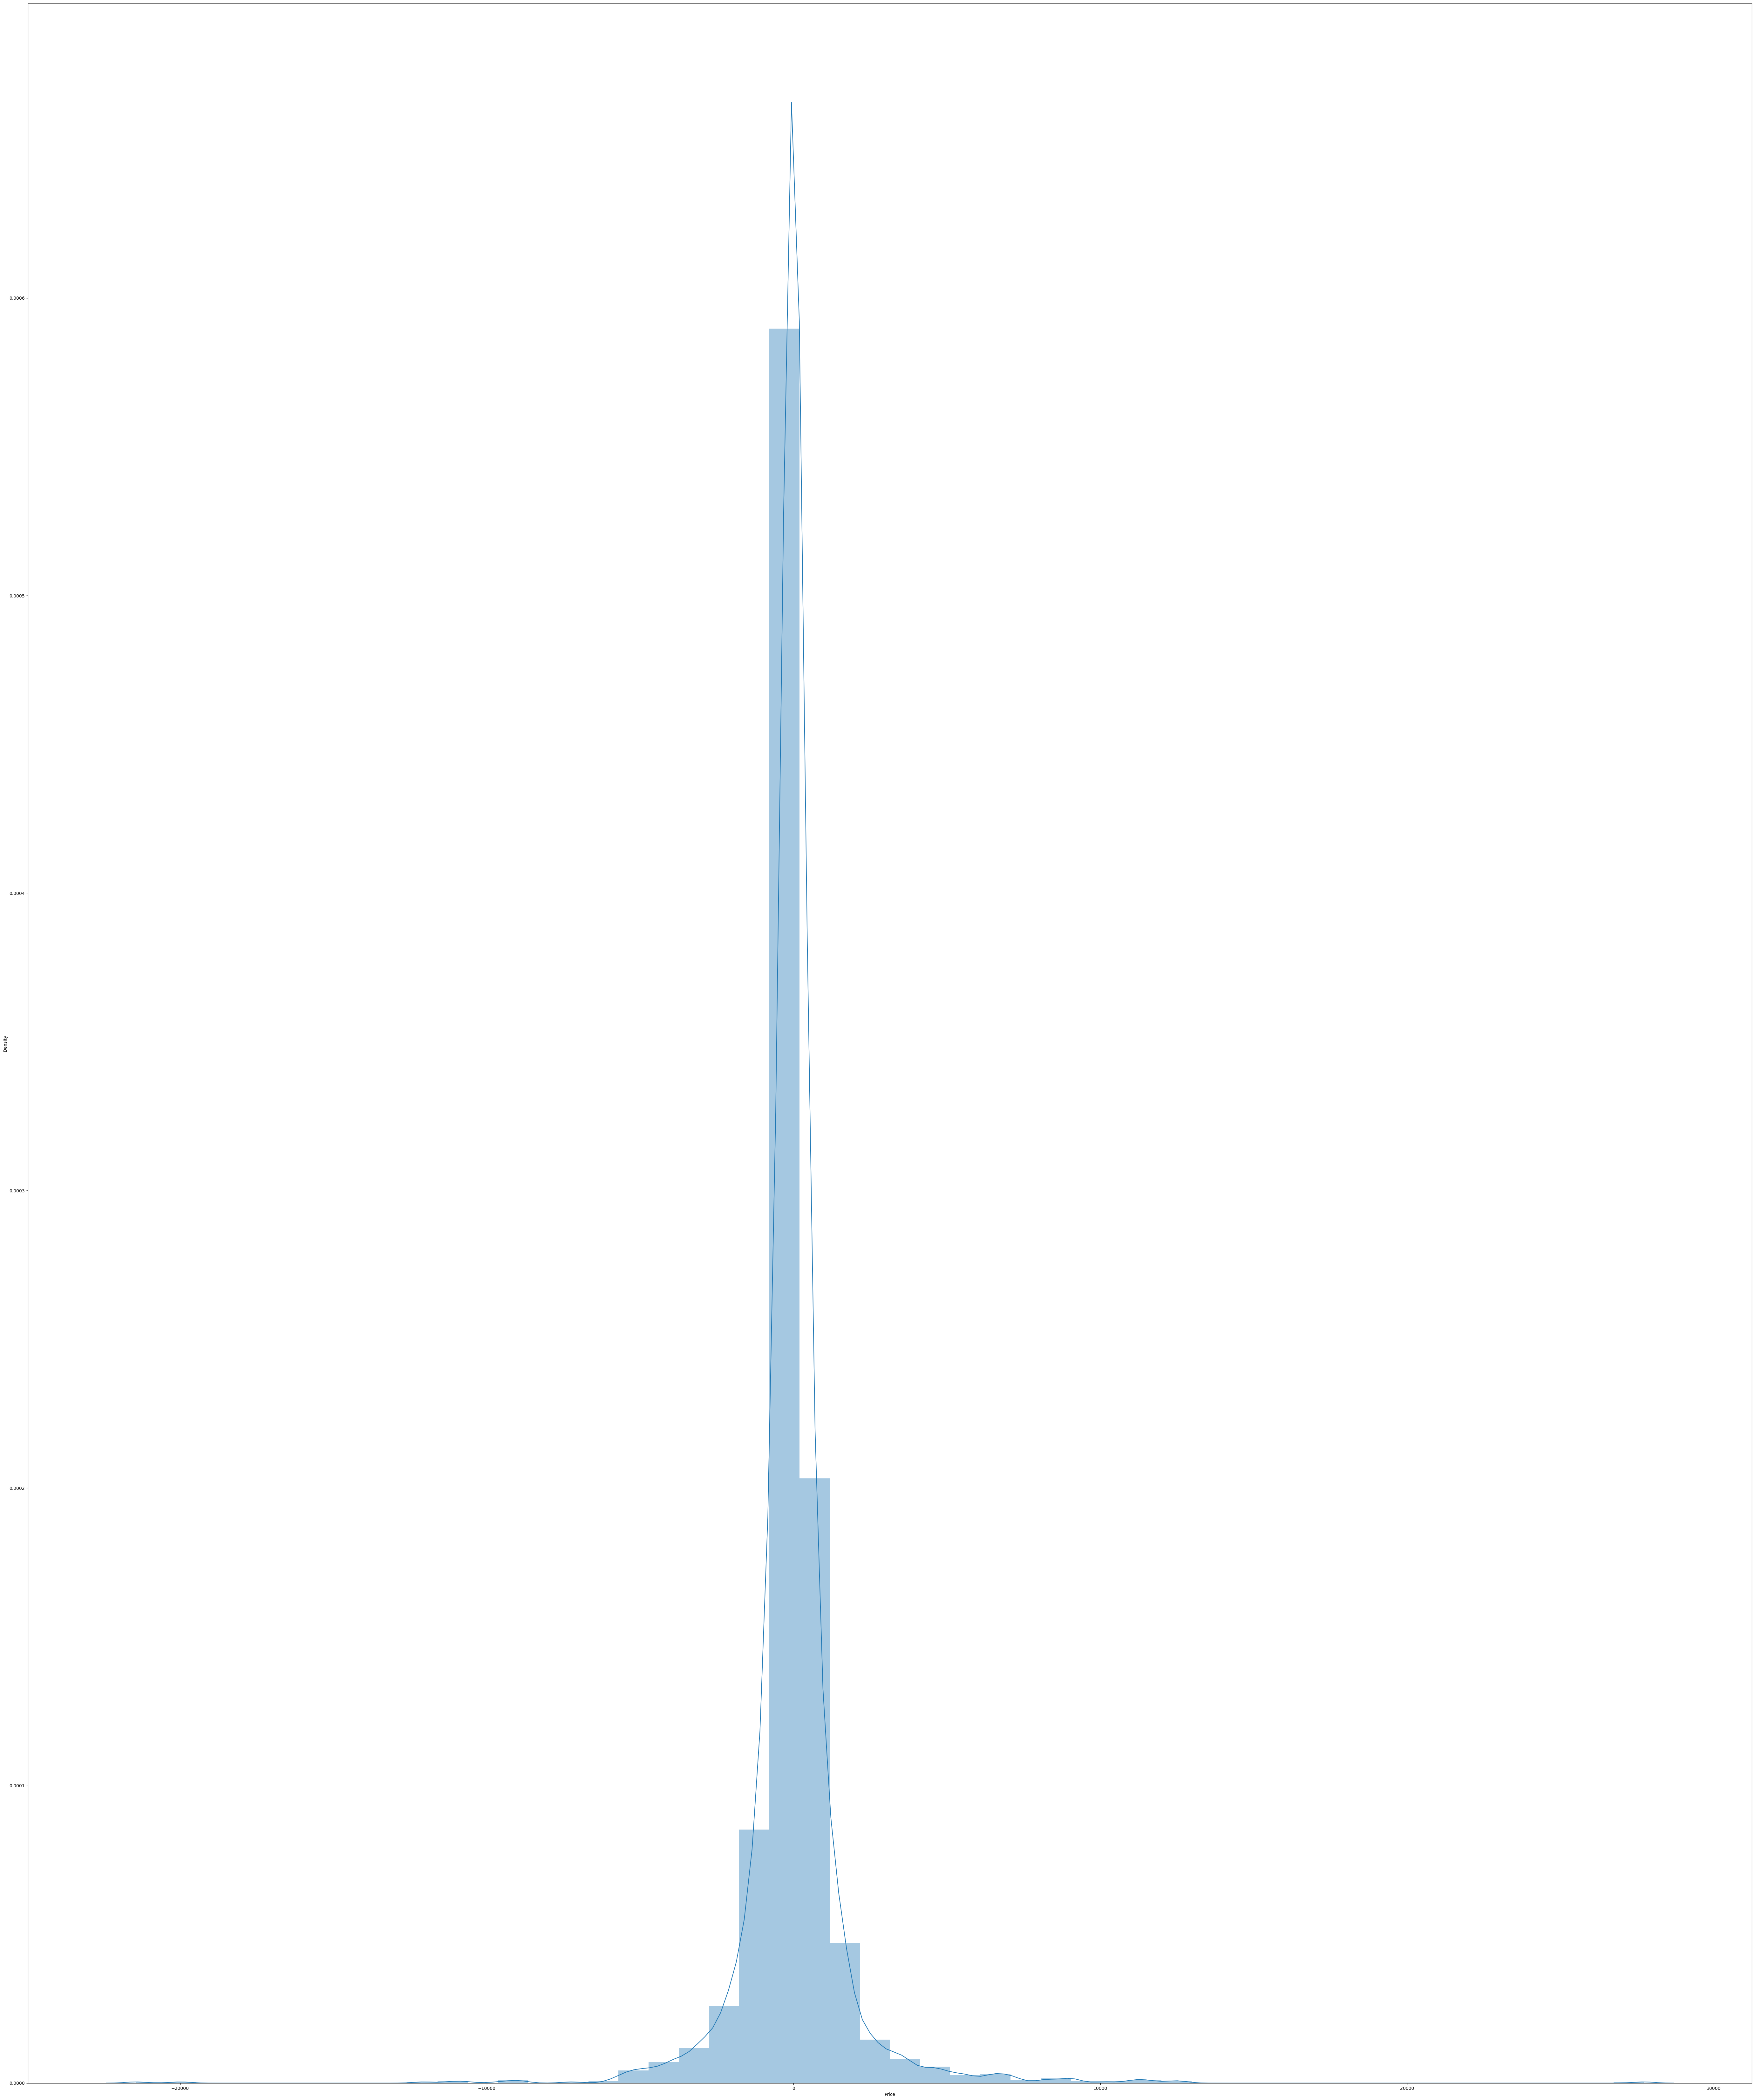

In [82]:
predict(BaggingRegressor())

# HyperParameter Tuning

In [83]:
from sklearn.model_selection import RandomizedSearchCV

In [84]:
params={'n_estimators': [100,120,150,180,200,240],\
        'max_features':["sqrt", "auto"],\
       'max_depth':[2,5,10,15,20],\
       'min_samples_split':[2,5,10],\
       'min_samples_leaf':[1,2,4,6,8],\
       'bootstrap':[True,False]}

In [85]:
hypertuning=RandomizedSearchCV(RandomForestRegressor(),params,n_iter=100,n_jobs=-1,verbose=3,cv=5,random_state=25)
hypertuning.fit(x_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [2, 5, 10, 15, 20],
                                        'max_features': ['sqrt', 'auto'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 120, 150, 180,
                                                         200, 240]},
                   random_state=25, verbose=3)

In [86]:
print(hypertuning.best_params_)

{'n_estimators': 120, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 20, 'bootstrap': False}


#### Checking After HyperTuning

Model Name : RandomForestRegressor(bootstrap=False, max_depth=20, max_features='sqrt',
                      n_estimators=120, random_state=25)
Training Score : 0.9937294166058486
Prediction values : [ 4158.4685     10903.73337692  6733.31145833 ...  4912.31926821
 10563.91428862  5239.75363759]


R2_score is : 0.8769274329561625


Adjusted R2 Score is : 0.8788413260379788


MSE is : 2360926.2003562353
MAE is : 815.3051733486408
RMSE is : 1536.5305725419964


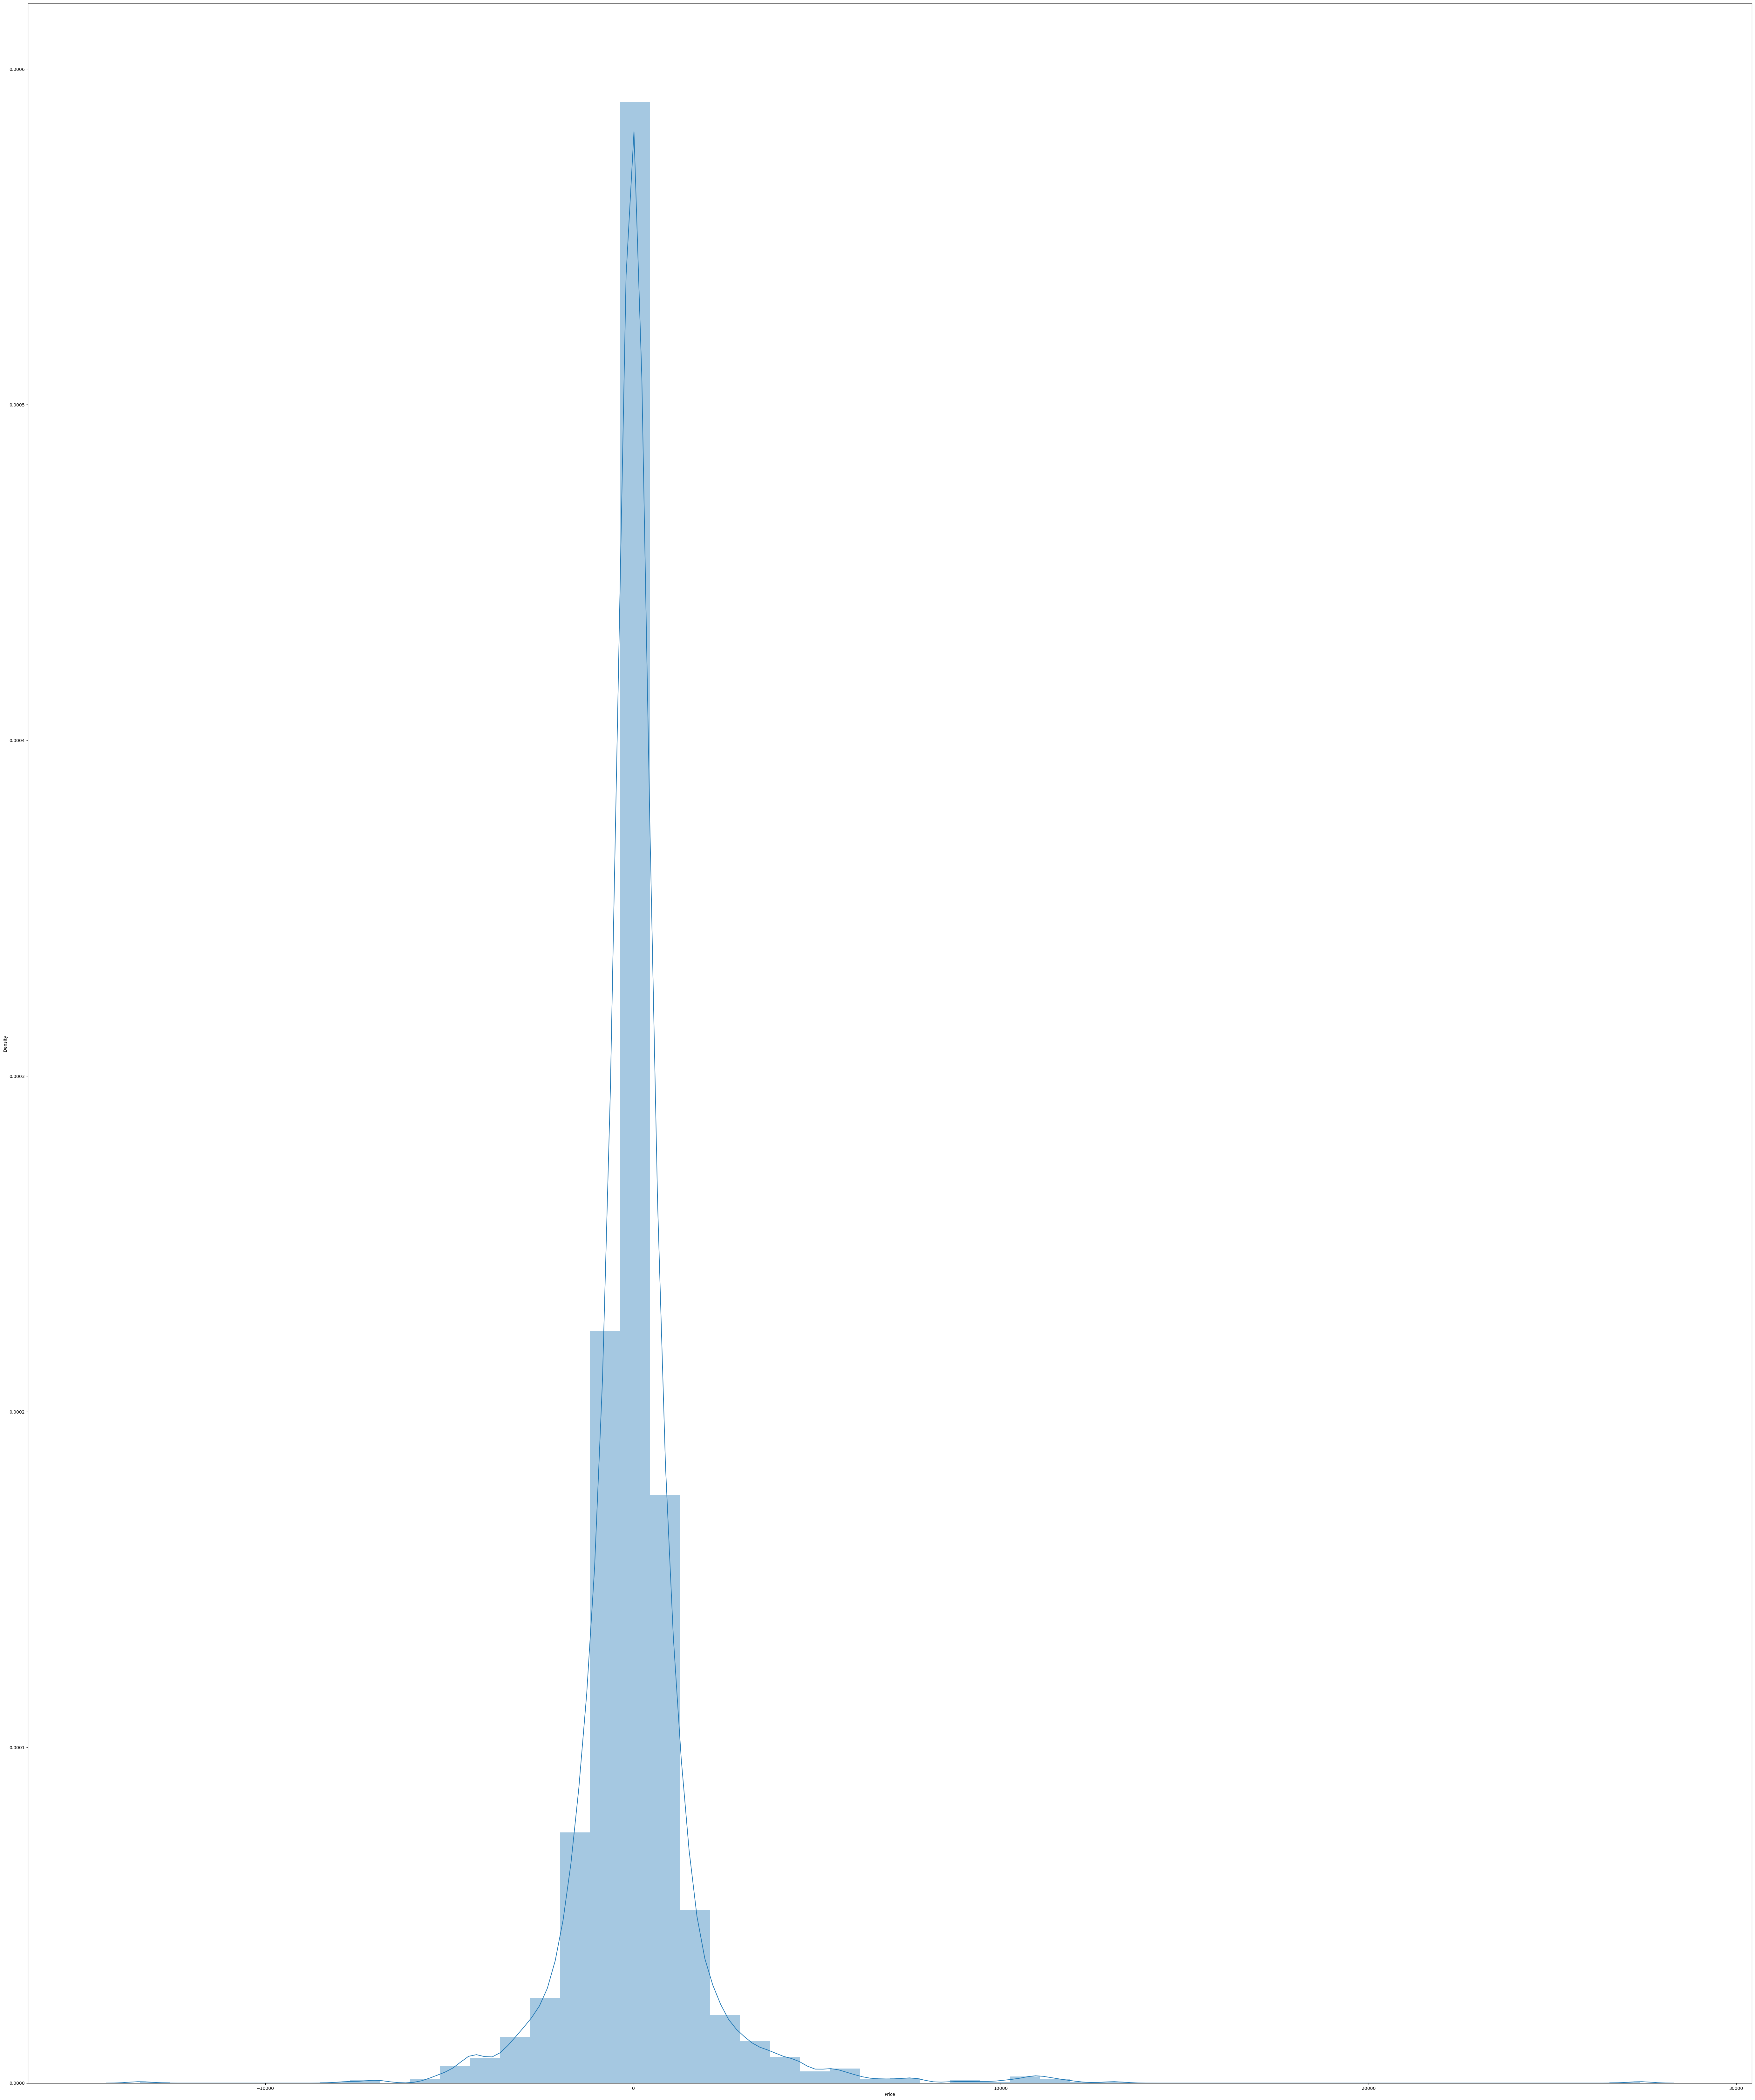

In [87]:
predict(RandomForestRegressor(n_estimators=120,min_samples_split=2,min_samples_leaf=1,max_features='sqrt',max_depth=20,bootstrap=False,random_state=25))

# **Model Tuning Summary for Random Forest Regression**

After creating multiple regression models, the Random Forest model achieved an R² score of 0.8846. The model was then tuned to explore if performance could be improved by adjusting hyperparameters such as n_estimators, max_depth, min_samples_split, and others.

**Hyperparameter Tuning**

Before tuning, the model achieved an R² score of 0.8846.
After tuning, the R² score remained at 0.8769, indicating that the model had already reached optimal performance with the initial hyperparameters.

**Performance Insights**

The unchanged R² score suggests that the original hyperparameters were either near optimal or that the model may have reached its performance limit    given the dataset.
The result could also imply that further improvements in model performance may require additional feature engineering, more data, or trying   alternative model architectures rather than hyperparameter adjustments.

**Conclusion**

Despite hyperparameter tuning, the Random Forest regression model maintained a strong performance with an R² score of 0.8769. The current model appears  to be well-tuned with an R² score of 0.8800.

## **Data Analysis Report**

##### **1. Introduction**
 
   The purpose of the analysis is to understand various factors influencing flight fares and to develop a predictive model.

##### **2. Dataset Overview**
 - Number of rows: 10683
 - Number of columns: 11
 - Target Variable: Price (Flight Fare)
 - Features: Airline, Source, Destination, Total_Stops, Duration, Date_of_Journey, Dep_Time, Arrival_Time, Route, Additional_Info.

##### **3. Data Cleaning and Preprocessing**
   
 - **Handling Missing Values**: As there were only 2 missing values, we directly dropped them, as they are very less.
 - **Outlier Treatment**: We chose not to handle outliers in the price column because flight fares can naturally vary widely, reflecting legitimate high       or low prices. Removing these outliers could distort the model's ability to predict future fares accurately.Outliers were observed                      in the Price column, with a few extremely high fares, likely corresponding to business-class or premium economic flights.
 - **Feature Engineering**: In this dataset we features Duration, Date_of_Journey, Dep_Time, Arrival_Time, but in object and we have formatted them to date and time by splitting and converting Date_of_Journey into Day and Month, Dep_Time, Arrival_Time into Hour and Minutes and Duration into Hour and minutes. And categorical features Airline, Source, Destination, Total_Stops, Additional_Info was encoded to numerical features.
   
##### **4. Exploratory Data Analysis (EDA)** 

 - **Airline vs Price**: There are slight differences between each companies on this graph, AirAsia seems to have the cheapest flights when Jet Airways, Multiple camers and Air India are more expensive. However it looks like Jet Airways Business Class are a little more expensive than the Jet Airways Economic Class.
 - **Total_stops vs Price**: The majority of flights are 1 stop and followed by 2 stops and non-stop. Non-stop flights tend to be cheaper, prices are highest for 1-stop flights, followed by 2-stop flights, with non-stop flights generally being the most affordable.
 - **Source vs Price**: Flights departing from Bangalore tend to have the highest prices, followed by other cities, while Chennai appears to offer more affordable options. Among the sources, Delhi has the highest frequency, followed by Kolkata and Bangalore.
 - **Destination vs Price**: New Delhi has the highest flight prices, followed by Cochin, while flights to Delhi are more affordable. In terms of destination frequency, Cochin has the most flights, followed by Bangalore and Delhi.

## **Performance Report for Flight Price Prediction Models**


**Overview of Models Evaluated**

#### Linear Regression

Performance Metrics:
- R² Score: 0.6235227041515081
- Adjusted R² Score: 0.6163308657869327
- Mean Absolute Error (MAE): 1924.3512465326605
- Mean Squared Error (MSE): 7222040.889838384
- Root Mean Squared Error (RMSE): 2687.3855119499294
  
#### Support Vector Regressor (SVR)

Performance Metrics:
- R² Score: 0.003656623389448499
- Adjusted R² Score: -0.009655616350177088
- Mean Absolute Error (MAE): 3539.34231794869
- Mean Squared Error (MSE): 19113058.57099237
- Root Mean Squared Error (RMSE): 4371.848415829667


#### K-Nearest Neighbors

Performance Metrics:
- R² Score: 0.5933780562173638
- Adjusted R² Score: 0.5860411972964275
- Mean Absolute Error (MAE): 1844.3497131931167
- Mean Squared Error (MSE): 7800311.830452518
- Root Mean Squared Error (RMSE): 2792.903834802143


#### Decision Tree Regressor

Performance Metrics:
- R² Score:   0.7655767037504192
- Adjusted R² Score:  0.7677792082394592
- Mean Absolute Error (MAE): 850.6545570427023
- Mean Squared Error (MSE): 4496989.990404363
- Root Mean Squared Error (RMSE): 2120.6107588155737

#### Bagging Regressor

Performance Metrics:
- R² Score: 0.864074940256252
- Adjusted R² Score: 0.8586482137109752
- Mean Absolute Error (MAE): 742.2347862226471
- Mean Squared Error (MSE): 2607478.193899183
- Root Mean Squared Error (RMSE): 1614.768774128105

#### Gradient Boosting Regressor:

Performance Metrics:
- R² Score: 0.8103380408991033
- Adjusted R² Score: 0.8081654328934664
- Mean Absolute Error (MAE): 1270.894196716594
- Mean Squared Error (MSE): 3638324.1140383845
- Root Mean Squared Error (RMSE):1907.439150808849571


#### Random Forest Regressor:

Performance Metrics:
- R² Score: 0.8800548764279971
- Adjusted R² Score: 0.8788413260379788
- Mean Absolute Error (MAE):  715.8293920996591
- Mean Squared Error (MSE): 2300931.813222364
- Root Mean Squared Error (RMSE): 1516.8822674230073

## Model Performance Comparison

#### Best Model: Random Forest Regressor

The Random Forest Regressor exhibited the highest accuracy and lowest error metrics compared to other models. It achieved the highest R² score - 0.8800548764279971, indicating that it explains the most variance in the target variable, and had the lowest MAE - 715.8293920996591, MSE - 2300931.813222364, and RMSE - 1516.8822674230073, suggesting it provides the most reliable predictions.

## Conclusion

The Random Forest Regressor has demonstrated the best performance among the evaluated models and is recommended for use in production to predict future flight prices. Its accuracy and robustness make it well-suited for helping customers plan their journeys and make informed decisions.



## **Challenges faced**


**Summary of Challenges Faced While working on project**

When working with time and date features (Duration, Date_of_Journey, Dep_Time, Arrival_Time) were stored as object (string) types, which presents several challenges when attempting to convert them into a usable datetime format. Below is a summary of the common challenges encountered during the conversion process and hyperparameter tuning:

**1. Separating Date and Time**
 - Problem: In this date and time are stored in a single string, which can make conversion to separate date and time objects difficult.Directly converting combined date-time strings might not provide the needed granularity for feature engineering.
 - Solution: Split the date and time components, converting them separately into datetime or time objects, and create additional features like day, month, hour and minutes. Used Python's pd.to_datetime() with the format parameter or regular expressions to ensure proper format parsing.

**2. Feature Redundancy**
 - Problem: Some features in the dataset had redundant information. Route directly corresponds to the value in Total_Stops, the two features are essentially conveying the same information, albeit in different formats.
 - Solution: Redundant features can lead to overfitting, making the model more complex without improving performance. Proper feature selection or dimensionality reduction methods are needed to avoid this, so we dropped the Route feature.

**3. Hyperparameter tuning**
Computational Cost and Time-Consumption
 - Problem: Hyperparameter tuning Random Search method was computationally expensive and time-consuming. It  took a long time to evaluate all possible parameter combinations, which lead to delays in the model development cycle.
 - Solution: As mentioned in the model tuning report that after creating multiple regression models, the Random Forest model achieved an R² score of 0.8769. The model was then tuned to explore if performance could be improved by adjusting hyperparameters such as n_estimators, max_depth, min_samples_split, and others, Before tuning, the model achieved an R² score of 0.8823. After tuning, the R² score remained at 0.8756, indicating that the model had already reached optimal performance with the initial hyperparameters.
